## YouTube's Inner World: A Data Exploration of Channel and Video Dynamics

Based on large-Scale channel and video Metadata from English-Speaking YouTube, we have a deep dive into this dataset. Featuring on time series analysis, statistical analysis, we explore, analyze, and concentrate the trends and characteristics of YouTube's channel. Insights are unlocked and shown at advanced visualization way.

#### Research Group
- **Group Name**: Laughtodeath666
- Shengze Jiang, Shengze.jiang@epfl.ch
- Shuhua Chen, Shuhua.chen@epfl.ch
- Xuanrui Li, xuanrui.li@epfl.ch
- Xinran Li, xinran.li@epfl.ch
- Xinyue Zhang, xinyue.zhang@epfl.ch


#### Dataset description
- `df_channels_en.tsv.gz`: contains data related to channel, category, join data, channel id & name, subscribers, rank, ect.
    - `category_cc`: category of the channel
    - `join_date`: join date of the channel
    - `channel`: channel id
    - `name_cc`: name of the channel
    - `subscribers_cc`: number of subscribers
    - `videos_cc`: number of videos
    - `subscriber_rank_sb`: rank in terms of number of subscribers
    - `weights`: weights cal
    - Note: 
        136,470 rows in total; 
        obtain it in 27/10/2019; 
        filter non-english channels.
- `df_timeseries_en.csv.gz`: latest category, datetime, views, subs, videos, and their changing amount.
    - `channel`: channel id
    - `category`: category according to the last 10 videos at time of crawl
    - `datetime`: week related to the data point
    - `views`: total number of views the channel had this week
    - `delta_views`: delta subscribers obtained this week
    - `subs`: total number of subscribers the channel had this week
    - `delta_subs`: rank in terms of number of subscribers
    - `videos`: total number of videos the channel had this week
    - `delta_videos`: delta videos obtained this week
    - `activity`: number of videos published in the last 15 days
    - Note: 18,872,499 data points belonging to 153,550 channels; 2.8 years of data for each channel in average; filter non-english channels; Data goes from early/01/2015 to end/09/2019 (incomplete time frame for some channels)
- `yt_metadata_en.jsonl.gz`: for each video of every channel, category, description, like/dislike counts, duration, tags, views, etc.
- `youtube_comments.tsv.gz`: anonymized user id, video id, replies, and likes received.

#### Our Tasks
- **Overall Profile Analysis**: Visualize the distributions, correlations, and trends of each feature.
- **Duration Modeling and Analysis**: Taking multiple factors into account, model the duration-orientated comprehensive judging model.
- **YouTube channel strategies**: Analyze the impact of diversification and specialization strategies on channels.

#### Main Ideas
- **Jack of all trades or master of one**: We wonder if YouTube creators should stick to one topic or mix it up. We can investigate this by analyzing three key aspects: the impact of content diversity on channel growth and engagement, long-term performance comparison between specialized and diversified channels, and common characteristics of successful diversification strategies.
- **Analysis of video duration**: We are interested in the impact of video duration. Will people prefer a longer video as they may get more knowledge, or they prefer a short video for passing time? We can explore this by investigating three aspects: optimal video length for different categories, the impact of video length on viewer engagement and channel growth, and the evolution of audience preferences for video length over time. Also, we are going to develop a method to evaluate the popular degree of a video, then focus on the relationship between video duration and popular degree.

### *Data Preprocessing*

In this section, we will preprocess the data to ensure that it is clean and ready for analysis.

First, we will sample the data to reduce the size of the dataset and improve processing speed. Then we will address missing values, filter the data, and calculate relevant metrics for our analysis. Finally, we will perform exploratory data analysis to understand the structure and content of the data.

In [1]:
# sample data
# %run src/data/sample_data.ipynb

In [1]:
# Import data
import pandas as pd
from src.data.loader import load_data

df_id, df_channels, df_timeseries, df_comments, df_metadata = load_data()

In [2]:
# View column names and data types of each dataframe
for df_name, df in [('df_id', df_id), 
                    ('df_channels', df_channels),
                    ('df_timeseries', df_timeseries), 
                    ('df_comments', df_comments),
                    ('df_metadata', df_metadata)]:
    print(f"\n{df_name} columns:")
    print(df.info())


df_id columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  13633 non-null  object
dtypes: object(1)
memory usage: 106.6+ KB
None

df_channels columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_cc         13633 non-null  object 
 1   join_date           13633 non-null  object 
 2   channel             13633 non-null  object 
 3   name_cc             13633 non-null  object 
 4   subscribers_cc      13633 non-null  int64  
 5   videos_cc           13633 non-null  int64  
 6   subscriber_rank_sb  13633 non-null  float64
 7   weights             13633 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 852.2+ KB
None

df_timeseries columns:
<clas

In [3]:
# Check missing values in each dataframe
display(pd.isna(df_id).sum())
display(pd.isna(df_channels).sum())
display(pd.isna(df_timeseries).sum())
display(pd.isna(df_comments).sum())
display(pd.isna(df_metadata).sum())

channel    0
dtype: int64

category_cc           0
join_date             0
channel               0
name_cc               0
subscribers_cc        0
videos_cc             0
subscriber_rank_sb    0
weights               0
dtype: int64

channel         0
category        0
datetime        0
views           0
delta_views     0
subs            0
delta_subs      0
videos          0
delta_videos    0
activity        0
dtype: int64

display_id    0
num_comms     0
dtype: int64

categories            0
channel_id            0
dislike_count    171758
display_id            0
duration              0
like_count       171758
upload_date           0
view_count           33
dtype: int64

We have identified the sources of missing/NaN data in each of our dataframes. The 'df_metadata' contains missing values in the 'dislike_count', 'like_count', and 'view_count' columns, with 171758 missing values in both 'dislike_count' and 'like_count', and 33 missing values in 'view_count'. All other dataframes have no missing values in any columns. Therefore, to address these missing values, we can fill them by calculating the mean based on 'channel_id'.

In [4]:
# fill missing values 
from src.data.preprocessor import fill_channel_means

df_metadata=fill_channel_means(df_metadata, ['dislike_count','like_count' ,'view_count'])
display(pd.isna(df_metadata).sum())

categories       0
channel_id       0
dislike_count    0
display_id       0
duration         0
like_count       0
upload_date      0
view_count       0
dtype: int64

In [5]:
df_id.head(10)

,channel
0,UC8vVgIytHRD8aJeYINpG1kQ
1,UCxg6sQ9zDWu0b5DK0Ck9vjA
2,UCsAegdhiYLEoaFGuJFVrqFQ
3,UCPl2eZVyzL-qI9n8III1jRQ
4,UCkaBrf3FRFWxXg6FEfIjgUA
5,UCdOXRB936PKSwx0J7SgF6SQ
6,UCnUOLTxgO9C1I4cgj3GshAA
7,UCHVLKMhgZL5O08rjSx3QpQA
8,UC9sJElk83diXHdvVE8Fbz1A
9,UCb06PxivXgwX3qj1JEWmwrw


In [7]:
df_channels.head(10)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Autos & Vehicles,2006-07-21,UC8vVgIytHRD8aJeYINpG1kQ,vsandvs,11500,1055,838440.0,10.8730
1,Autos & Vehicles,2009-01-21,UCxg6sQ9zDWu0b5DK0Ck9vjA,V12 Productions,14100,274,737004.0,9.3105
2,Autos & Vehicles,2006-03-11,UCsAegdhiYLEoaFGuJFVrqFQ,MotorTrend Channel,6380000,2231,1160.0,2.0870
3,Autos & Vehicles,2010-08-02,UCPl2eZVyzL-qI9n8III1jRQ,Mercedes-Benz MYVAN,25780,304,471490.0,7.5720
4,Autos & Vehicles,2013-10-13,UCkaBrf3FRFWxXg6FEfIjgUA,fz09 dave,22000,92,519580.0,9.4240
5,Autos & Vehicles,2015-06-11,UCdOXRB936PKSwx0J7SgF6SQ,EddieX,84500,331,184399.0,4.5440
6,Autos & Vehicles,2008-08-30,UCnUOLTxgO9C1I4cgj3GshAA,SmallEngineMechanic,30100,292,398177.0,6.4970
7,Autos & Vehicles,2014-03-06,UCHVLKMhgZL5O08rjSx3QpQA,trailsoffroad.com,11200,1041,815295.0,12.0045
8,Autos & Vehicles,2015-12-17,UC9sJElk83diXHdvVE8Fbz1A,Money4yourMotors Lim...,10561,232,907859.0,15.3590
9,Autos & Vehicles,2012-10-02,UCb06PxivXgwX3qj1JEWmwrw,Galaxy89cars,25188,439,458635.0,8.8015


In [8]:
df_timeseries.head(10)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
714,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-08-01 00:00:00,1.530218e+07,13128.000,70608.625,0.000,92,0,1
715,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-08-08 00:00:00,1.532940e+07,27218.250,70709.500,100.875,93,1,2
716,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-08-15 00:00:00,1.535108e+07,21688.500,70794.250,84.750,93,0,1
717,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-08-22 00:00:00,1.539080e+07,39716.250,70936.000,141.750,94,1,1
718,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-08-29 00:00:00,1.541910e+07,28302.750,71038.375,102.375,94,0,1
719,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-09-05 00:00:00,1.545100e+07,31896.750,71117.500,79.125,94,0,0
720,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-09-12 00:00:00,1.537658e+07,0.000,71210.875,93.375,96,2,2
721,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-09-19 00:00:00,1.534019e+07,0.000,71301.000,90.125,96,0,2
722,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-09-26 00:00:00,1.536618e+07,25985.875,71377.625,76.625,97,1,2
723,UCRmRfTjSmzD1FQn3Iwp2fiQ,Science & Technology,2016-10-03 00:00:00,1.539366e+07,27485.375,71456.750,79.125,97,0,1


In [9]:
df_comments.head(10)

,display_id,num_comms
11303,aJUPKst0VWE,1.0
11304,1nD8xqURS_8,1.0
11305,JP8bObJpx7w,2.0
11306,CecDZi3WeSE,1.0
11307,ptBLjEa-TBM,1.0
11308,QMV0n63mJNk,3.0
11309,NhQro0dE1qA,0.0
11310,Ko7pe2Jyew8,0.0
11311,ECV9GeQozFM,0.0
11312,hAt7LbKA-sw,1.0


In [10]:
df_metadata.head(10)

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,3.0,aJUPKst0VWE,319,22.0,2019-09-09,384.0
1,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,0.0,1nD8xqURS_8,729,29.0,2019-09-08,591.0
2,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,8.0,JP8bObJpx7w,629,44.0,2019-08-27,1397.0
3,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,0.0,CecDZi3WeSE,496,28.0,2019-06-03,456.0
4,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,1.0,ptBLjEa-TBM,25,12.0,2019-06-02,323.0
5,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,4.0,QMV0n63mJNk,2235,26.0,2019-06-02,352.0
6,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,2.0,NhQro0dE1qA,764,30.0,2019-04-22,464.0
7,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,3.0,Ko7pe2Jyew8,2115,28.0,2019-04-17,574.0
8,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,3.0,ECV9GeQozFM,317,20.0,2019-04-17,331.0
9,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,3.0,hAt7LbKA-sw,96,16.0,2019-04-16,404.0


### *IDEA1: Jack of all trades or master of one*
We wonder if YouTube creators should stick to one topic or mix it up. We can investigate this by analyzing three key aspects: the impact of content diversity on channel growth and engagement, long-term performance comparison between specialized and diversified channels, and common characteristics of successful diversification strategies

#### Mathematical Details
1. **Channel Content Diversity (Shannon's Entropy)**:

    For a channel's content categories:
    
    $H = -\sum_{i=1}^{n} p_i \ln(p_i)$, where:
    
    $H$ = Shannon's diversity index
    
    $p_i$ = proportion of videos in category $i$
    
    $n$ = total number of categories
    
2. **Engagement Rate**:

    $ER = \min(\frac{L}{V} \times 100, 100)$, where:
    
    $L$ = likes
    
    $V$ = views
    
3. **Growth Rates**:

    Weekly growth rates:
    
    $G_s = \frac{S_f - S_i}{w}$
    
    $G_v = \frac{V_f - V_i}{w}$, where:
    
    $G_s$ = subscriber growth rate
    
    $G_v$ = view growth rate
    
    $S_f, V_f$ = final values
    
    $S_i, V_i$ = initial values
    
    $w$ = number of weeks

In [11]:
from src.utils.content import preprocess_data, calculate_channel_metrics

print("Preprocessing data...")
filtered_metadata, filtered_timeseries = preprocess_data(df_metadata, df_timeseries, 0)
    
print("Calculating channel metrics...")
merged_metrics = calculate_channel_metrics(filtered_metadata, filtered_timeseries)
print(merged_metrics.info())

Preprocessing data...
Calculating channel metrics...
<class 'pandas.core.frame.DataFrame'>
Index: 13345 entries, 0 to 13632
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   channel_id           13345 non-null  object  
 1   view_count           13345 non-null  float64 
 2   like_count           13345 non-null  float64 
 3   categories           13345 non-null  object  
 4   engagement_rate      13345 non-null  float64 
 5   diversity            13345 non-null  float64 
 6   num_categories       13345 non-null  int64   
 7   main_category        13345 non-null  object  
 8   main_category_ratio  13345 non-null  float64 
 9   sub_growth           13345 non-null  float64 
 10  weeks                13345 non-null  float64 
 11  view_growth          13345 non-null  float64 
 12  final_views          13345 non-null  float64 
 13  final_subs           13345 non-null  float64 
 14  weekly_sub_growth    1

In [12]:
from src.utils.content import identify_patterns

print("Identifying success patterns...")
patterns, successful_channels = identify_patterns(merged_metrics)

Identifying success patterns...

=== Content Strategy Analysis Results ===

Number of successful channels: 7471
Average diversity index: 0.33
Average number of categories: 2.8
Average main category ratio: 87.2%
Average views: 664,421
Average engagement: 0.024
Average weekly subscriber growth: 2422.2
Average weekly view growth: 676904.2
Average active weeks: 132.3

Successful Strategy Characteristics:

Strategy: Specialized
Proportion: 81.4%
Weekly average subscriber growth: 2530.7
Weekly average view growth: 717,751
Content diversity: 0.18

Strategy: Mixed
Proportion: 17.2%
Weekly average subscriber growth: 1988.3
Weekly average view growth: 507,182
Content diversity: 0.91

Strategy: Diversified
Proportion: 1.5%
Weekly average subscriber growth: 1478.0
Weekly average view growth: 396,569
Content diversity: 1.53


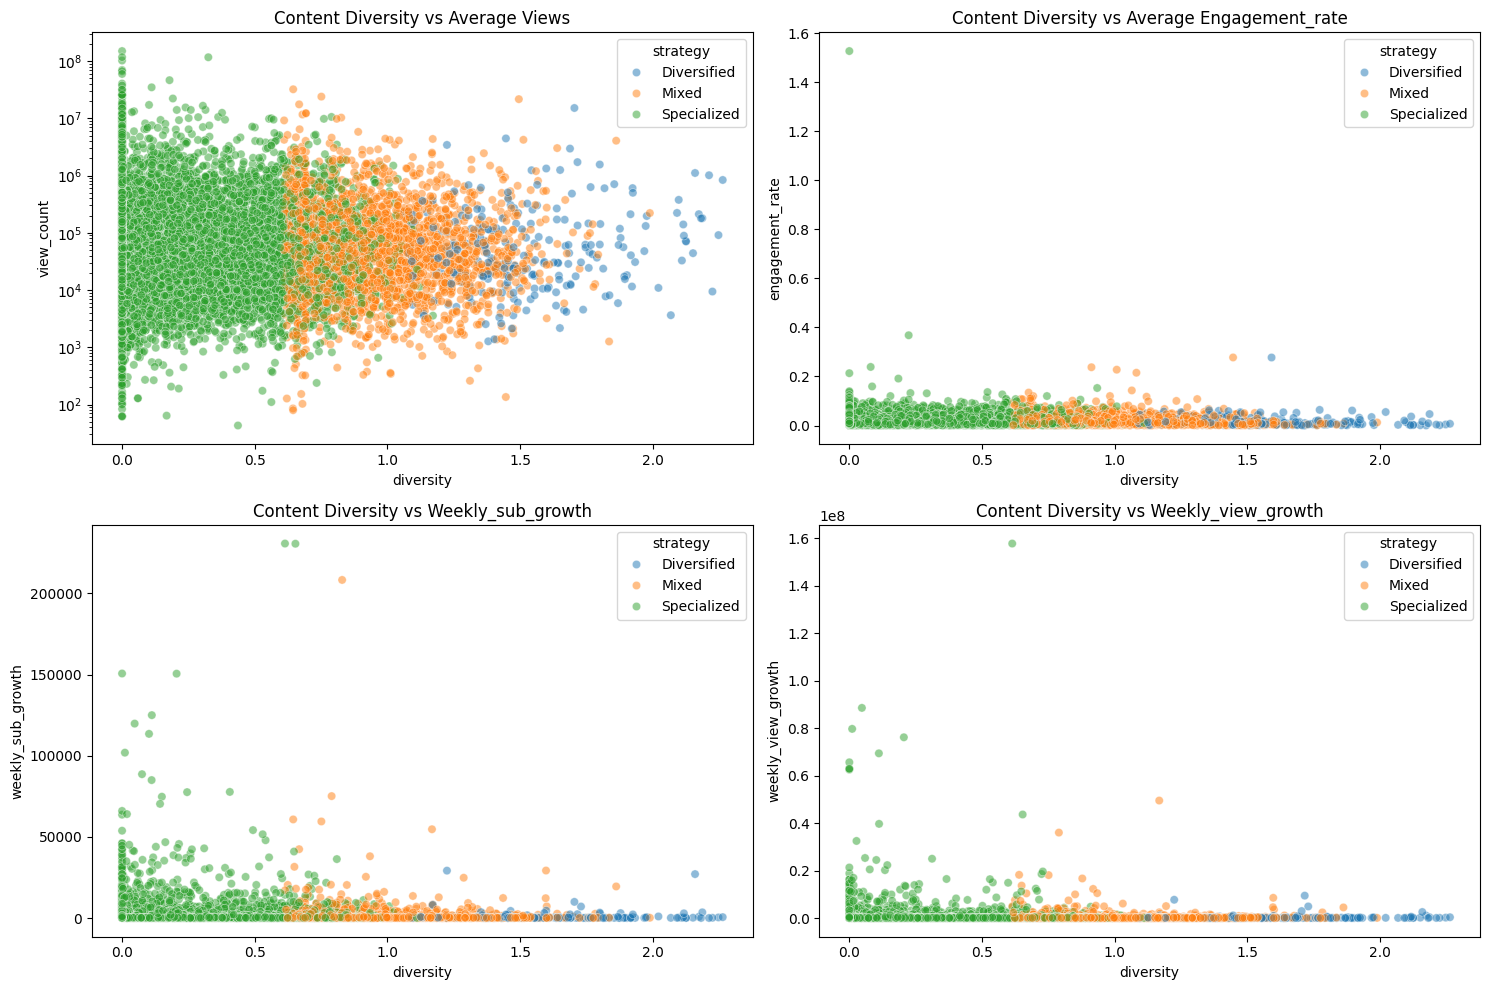

In [13]:
from src.utils.content import diversity_plot_insights

# Create key insight visualizations
plot = diversity_plot_insights(merged_metrics)

#### Mathematical Details
**One-Way ANOVA**:

$F = \frac{MSB}{MSW}$, where:

$MSB = \frac{\sum_{i=1}^k n_i(\bar{x_i} - \bar{x})^2}{k-1}$

$MSW = \frac{\sum_{i=1}^k\sum_{j=1}^{n_i}(x_{ij} - \bar{x_i})^2}{N-k}$

$n_i$ = size of group $i$

$\bar{x_i}$ = mean of group $i$

$\bar{x}$ = overall mean

$k$ = number of groups

$N$ = total sample size


In [14]:
from src.utils.content import ANOVA

# Perform an analysis of variance (ANOVA) to determine if there are significant differences between content strategies
ANOVA(merged_metrics)

Analysis of Variance Results:
View Count - F: 3.2724058590257874, p-value: 0.037945532790180155
Engagement Rate - F: 0.2712048262614672, p-value: 0.7624645117204254
Weekly Subscriber Growth - F: 5.139218011130636, p-value: 0.005873882517531403
Weekly View Growth - F: 3.1755525796979893, p-value: 0.041802589120499285


In the results shown above, we can observe the relationships between content diversity (`diversity`) and key channel performance metrics (`view count`, `engagement rate`, `subscriber growth`, and `view growth`), differentiated by content strategy (`Diversified`, `Mixed`, `Specialized`):

1. **Content Diversity vs. Average Views**: In the first chart, we can see that as content diversity increases, view counts exhibit some dispersion. Extremely high and low view counts are primarily found in channels with a Specialized strategy, while view counts for Diversified channels are relatively concentrated around a moderate level. The analysis of variance results indicate that content strategy has a significant effect on view counts, suggesting that more specialized channels may experience greater variability in view counts, with a higher potential for achieving very high views, whereas diversified channels tend to show more stable but moderate view counts.

2. **Content Diversity vs. Engagement Rate**: In the second chart, we observe a trend where engagement rate decreases as content diversity increases. High engagement rates are mostly seen in channels with a Specialized strategy, while Diversified channels tend to have lower engagement rates. However, The analysis of variance results show that the differences in engagement rate between strategies are not statistically significant, suggesting that while specialized content may promote viewer engagement, content strategy may not be the primary factor influencing engagement rates.

3. **Content Diversity vs. Weekly Subscriber Growth**: The third chart illustrates the relationship between subscriber growth and diversity. High subscriber growth is mostly seen in channels with Specialized and Mixed strategies, while Diversified channels generally show average performance in terms of subscriber growth. The analysis of variance results indicate a significant difference in weekly subscriber growth across strategies, suggesting that Specialized or Mixed strategies may be more conducive to subscriber growth.

4. **Content Diversity vs. Weekly View Growth**: The fourth chart shows a similar trend between view growth and diversity. Higher view growth is more common among Specialized channels, while Diversified channels tend to have lower view growth. The analysis of variance results also confirm a significant difference in weekly view growth across strategies, which may imply that channels focusing on specific content are better able to sustain viewer interest.

Through these observations and the analysis of variance results, we can conclude that there are significant differences in view count, weekly subscriber growth, and weekly view growth across content strategies, while engagement rate does not show a significant difference.

Next, we will analyze content strategy by main content category (`main_category`) to explore the relationships between diversity and performance within different categories.

In [15]:
# 1. Calculate mean and median for each content category
# Summarize diversity, view count, engagement rate, weekly subscriber growth, and weekly view growth
category_summary = merged_metrics.groupby('main_category').agg({
    'diversity': ['mean', 'median'],
    'view_count': ['mean', 'median'],
    'engagement_rate': ['mean', 'median'],
    'weekly_sub_growth': ['mean', 'median'],
    'weekly_view_growth': ['mean', 'median']
})

print("Mean and Median values for each content category:")
print(category_summary)

Mean and Median values for each content category:
                      diversity               view_count                 \
                           mean    median           mean         median   
main_category                                                             
Autos & Vehicles       0.349865  0.171262  134922.694631   42544.518603   
Comedy                 0.542463  0.495341  453019.340951  141088.934132   
Education              0.403180  0.308495  419967.044572   28820.963934   
Entertainment          0.455870  0.367649  489426.594136   72841.165766   
Film & Animation       0.488281  0.422937  338757.544792   72679.582399   
Gaming                 0.243602  0.071585  132098.621468   29099.781106   
Howto & Style          0.377202  0.248953  145717.769120   35736.544804   
Music                  0.218657  0.046340  978190.091255   90032.210377   
News & Politics        0.462077  0.338840   55436.983859   13843.081232   
Nonprofits & Activism  0.512612  0.440433   53151.

In [16]:
# 2. Calculate the proportion of each strategy within each content category
# Group by main_category and strategy to find strategy distribution within each category
category_strategy_distribution = merged_metrics.groupby(['main_category', 'strategy'],observed=True).size().unstack(fill_value=0)
category_strategy_distribution = category_strategy_distribution.div(category_strategy_distribution.sum(axis=1), axis=0)

print("Proportion of each strategy within each content category:")
print(category_strategy_distribution)

Proportion of each strategy within each content category:
strategy               Diversified     Mixed  Specialized
main_category                                            
Autos & Vehicles          0.020349  0.130814     0.848837
Comedy                    0.029178  0.294430     0.676393
Education                 0.024357  0.188092     0.787551
Entertainment             0.023810  0.250729     0.725462
Film & Animation          0.050847  0.262712     0.686441
Gaming                    0.007641  0.097300     0.895059
Howto & Style             0.012821  0.198291     0.788889
Music                     0.005887  0.093776     0.900336
News & Politics           0.028037  0.219626     0.752336
Nonprofits & Activism     0.032609  0.282609     0.684783
People & Blogs            0.016966  0.220060     0.762974
Pets & Animals            0.017391  0.200000     0.782609
Science & Technology      0.021142  0.209302     0.769556
Sports                    0.015326  0.134100     0.850575
Travel & Event

In [17]:
from src.utils.content import variance4each

# 3. Perform an Analysis of Variance for each content category
# Conduct the analysis on each main_category to determine if strategies differ significantly within the category
analysis_variance_results=variance4each(merged_metrics)

The Analysis of Variance Results for Each Content Category:
                 Category              Metric   F-Value   P-Value
0        Autos & Vehicles     engagement_rate  4.080090  0.017738
1        Autos & Vehicles          view_count  0.127374  0.880446
2        Autos & Vehicles   weekly_sub_growth  0.193242  0.824373
3        Autos & Vehicles  weekly_view_growth  0.284690  0.752426
4                  Comedy     engagement_rate  0.569826  0.566114
5                  Comedy          view_count  4.322074  0.013942
6                  Comedy   weekly_sub_growth  3.701527  0.025595
7                  Comedy  weekly_view_growth  3.308890  0.037630
8               Education     engagement_rate  2.666497  0.070167
9               Education          view_count  0.756693  0.469580
10              Education   weekly_sub_growth  2.464304  0.085770
11              Education  weekly_view_growth  0.712930  0.490544
12          Entertainment     engagement_rate  1.109578  0.329895
13          Ente

In [18]:
from src.utils.content import significant_analysis

# significant and non-significant results
significant_results=significant_analysis(analysis_variance_results)

Significant Results (p < 0.05):
           Category              Metric   F-Value   P-Value
0  Autos & Vehicles     engagement_rate  4.080090  0.017738
1            Comedy          view_count  4.322074  0.013942
2            Comedy   weekly_sub_growth  3.701527  0.025595
3            Comedy  weekly_view_growth  3.308890  0.037630
4            Gaming          view_count  3.639526  0.026442
5     Howto & Style          view_count  7.993617  0.000356
6   Travel & Events   weekly_sub_growth  4.407061  0.013497

Non-Significant Results (p >= 0.05):
                 Category              Metric   F-Value   P-Value
0        Autos & Vehicles          view_count  0.127374  0.880446
1        Autos & Vehicles   weekly_sub_growth  0.193242  0.824373
2        Autos & Vehicles  weekly_view_growth  0.284690  0.752426
3                  Comedy     engagement_rate  0.569826  0.566114
4               Education     engagement_rate  2.666497  0.070167
5               Education          view_count  0.75669

In the above analysis, we have divided the results into two groups: significant and non-significant.

**Significant Results (p < 0.05):**

In these categories and metrics, the differences between strategies are significant. This indicates that in these specific categories, content strategy (Diversified, Mixed, Specialized) has a noticeable impact on metrics such as view count, engagement rate, and subscriber growth. For example, in the Gaming category’s view count and several metrics in the Comedy category, strategy has a clear effect on performance. This suggests that selecting the appropriate strategy in these categories can significantly improve performance.

**Non-Significant Results (p >= 0.05):**

In these categories and metrics, the differences between strategies are not significant, indicating that content strategy has a smaller or negligible impact on these metrics. For example, in the Music and Education categories, all metrics have p-values greater than 0.05, suggesting that differences in performance between strategies are not significant. In these categories, content strategy may not be the primary factor influencing performance, and other factors (such as content quality or audience demand) might be more important.

Next, further analyze the specific performance of different strategies for categories and metrics with significant differences to identify the optimal strategy combinations.

In [19]:
from src.utils.content import significant_means_value

significant_means=significant_means_value(significant_results, merged_metrics)

Mean values for significant categories and metrics by strategy:
            Category              Metric     Strategy     Mean_Value
0             Gaming          view_count  Diversified  113901.213431
1             Gaming          view_count        Mixed  209409.111308
2             Gaming          view_count  Specialized  123849.707160
3             Comedy          view_count  Diversified  174804.569499
4             Comedy          view_count        Mixed  215066.261533
5             Comedy          view_count  Specialized  568600.338211
6             Comedy   weekly_sub_growth  Diversified     551.666367
7             Comedy   weekly_sub_growth        Mixed    1103.667565
8             Comedy   weekly_sub_growth  Specialized    2468.577835
9             Comedy  weekly_view_growth  Diversified  124007.375820
10            Comedy  weekly_view_growth        Mixed  173245.377820
11            Comedy  weekly_view_growth  Specialized  640325.729518
12     Howto & Style          view_coun

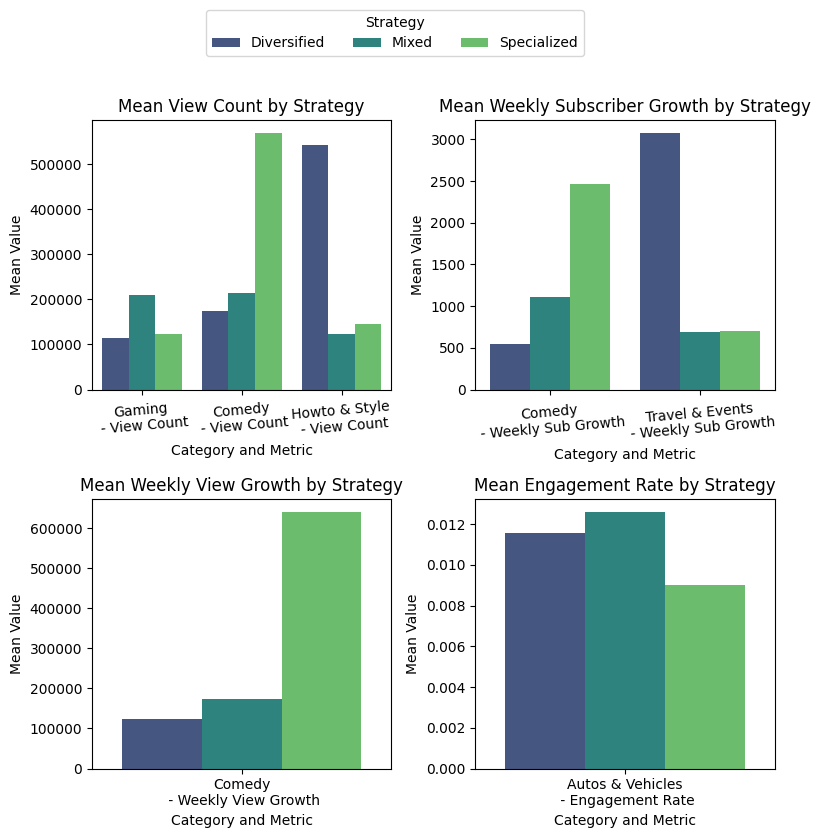

In [20]:
from src.utils.content import metrics_plot_insights

# Creating a plot for metrics
metrics_plot_insights(significant_means)

**Specialized Strategy**: Suitable for the Comedy channel, where audiences prefer specific content styles. Using a specialized strategy can effectively increase view counts and subscriber growth.

**Mixed Strategy**: Suitable for Gaming and Autos & Vehicles channels, which need a balance between diversity and focus to attract a broader audience.

**Diversified Strategy**: Suitable for Howto & Style and Travel & Events channels, where audiences have a high demand for diverse content. A diversified strategy can attract more audience interest.

### *IDEA2: Analysis of video duration*
We are interested in the impact of video duration. Will people prefer a longer video as they may get more knowledge, or they prefer a short video for passing time? We can explore this by investigating three aspects: optimal video length for different categories, the impact of video length on viewer engagement and channel growth, and the evolution of audience preferences for video length over time. Also, we are going to develop a method to evaluate the popular degree of a video, then focus on the relationship between video duration and popular degree.


#### Mathematical Details

**Videa Popularity Score**:

For each video:

$PS = 0.5\frac{\ln(1+V)}{\ln(1+V_{max})} + 0.3\frac{\ln(1+L)}{\ln(1+L_{max})} + 0.2\frac{\ln(1+C)}{\ln(1+C_{max})}$, where:

$V$ = views

$L$ = likes

$C$ = comments

$V_{max}, L_{max}, C_{max}$ = maximum values across dataset

$\ln(1+x)$ transformation reduces skewness

**Calculation of popular degree of a video**

A preliminary method to evaluate the popular degree of a video was obtained by normalizing and redistributing different weights based on the number of views, likes, and comments.

           categories  year  max_view_count_duration  max_like_count_duration  max_num_comms_duration  max_popularity_score_duration
0    Autos & Vehicles  2006                 1.571667                 1.755000                1.650000                       1.755000
1    Autos & Vehicles  2007                 5.588333                 5.176667                3.988333                       5.425000
2    Autos & Vehicles  2008                 7.730000                 8.095000                5.858333                       8.146667
3    Autos & Vehicles  2009                 4.130000                 5.030000                5.606667                       5.036667
4    Autos & Vehicles  2010                 5.020000                 8.013333                6.230000                       6.916667
..                ...   ...                      ...                      ...                     ...                            ...
213   Travel & Events  2015                 8.366667                 

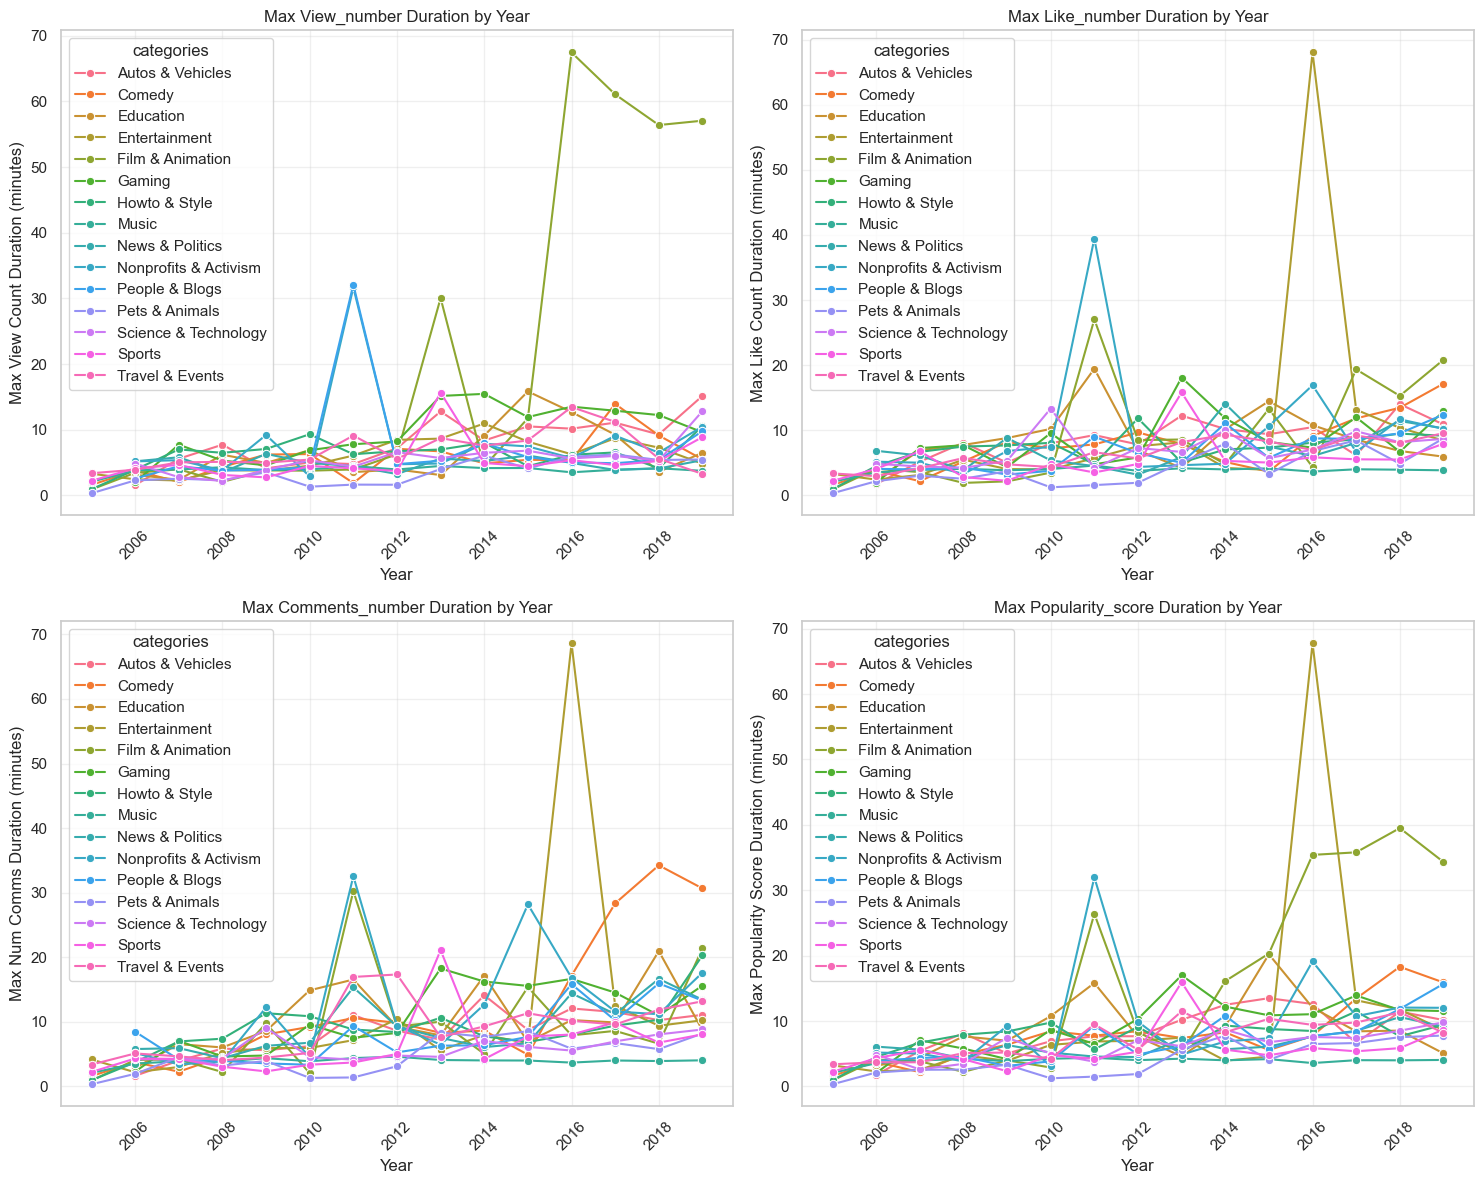

In [21]:
from src.utils.duration import optimal_video_length, plot_max_duration

# Run analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.width',1000)
optimal_durations_df = optimal_video_length(df_metadata, df_comments)
print(optimal_durations_df)
plt_max_duration = plot_max_duration(optimal_durations_df)

**Optimal video length for different categories**

In the above analysis, we have provided the mean duration of the ten beat videos corresponding to different categories and years under the criteria of maximum number of views, maximum number of likes, maximum number of comments, and best popularity score. 
The optimal video length under the category of Music always tends to be shorter, while category of Film & Animation, Entertainment, and Comedy have sometimes achieved better playback effects in recent years. Especially from 2016 to 2018, the optimal video length for different categories gradually became differentiated.

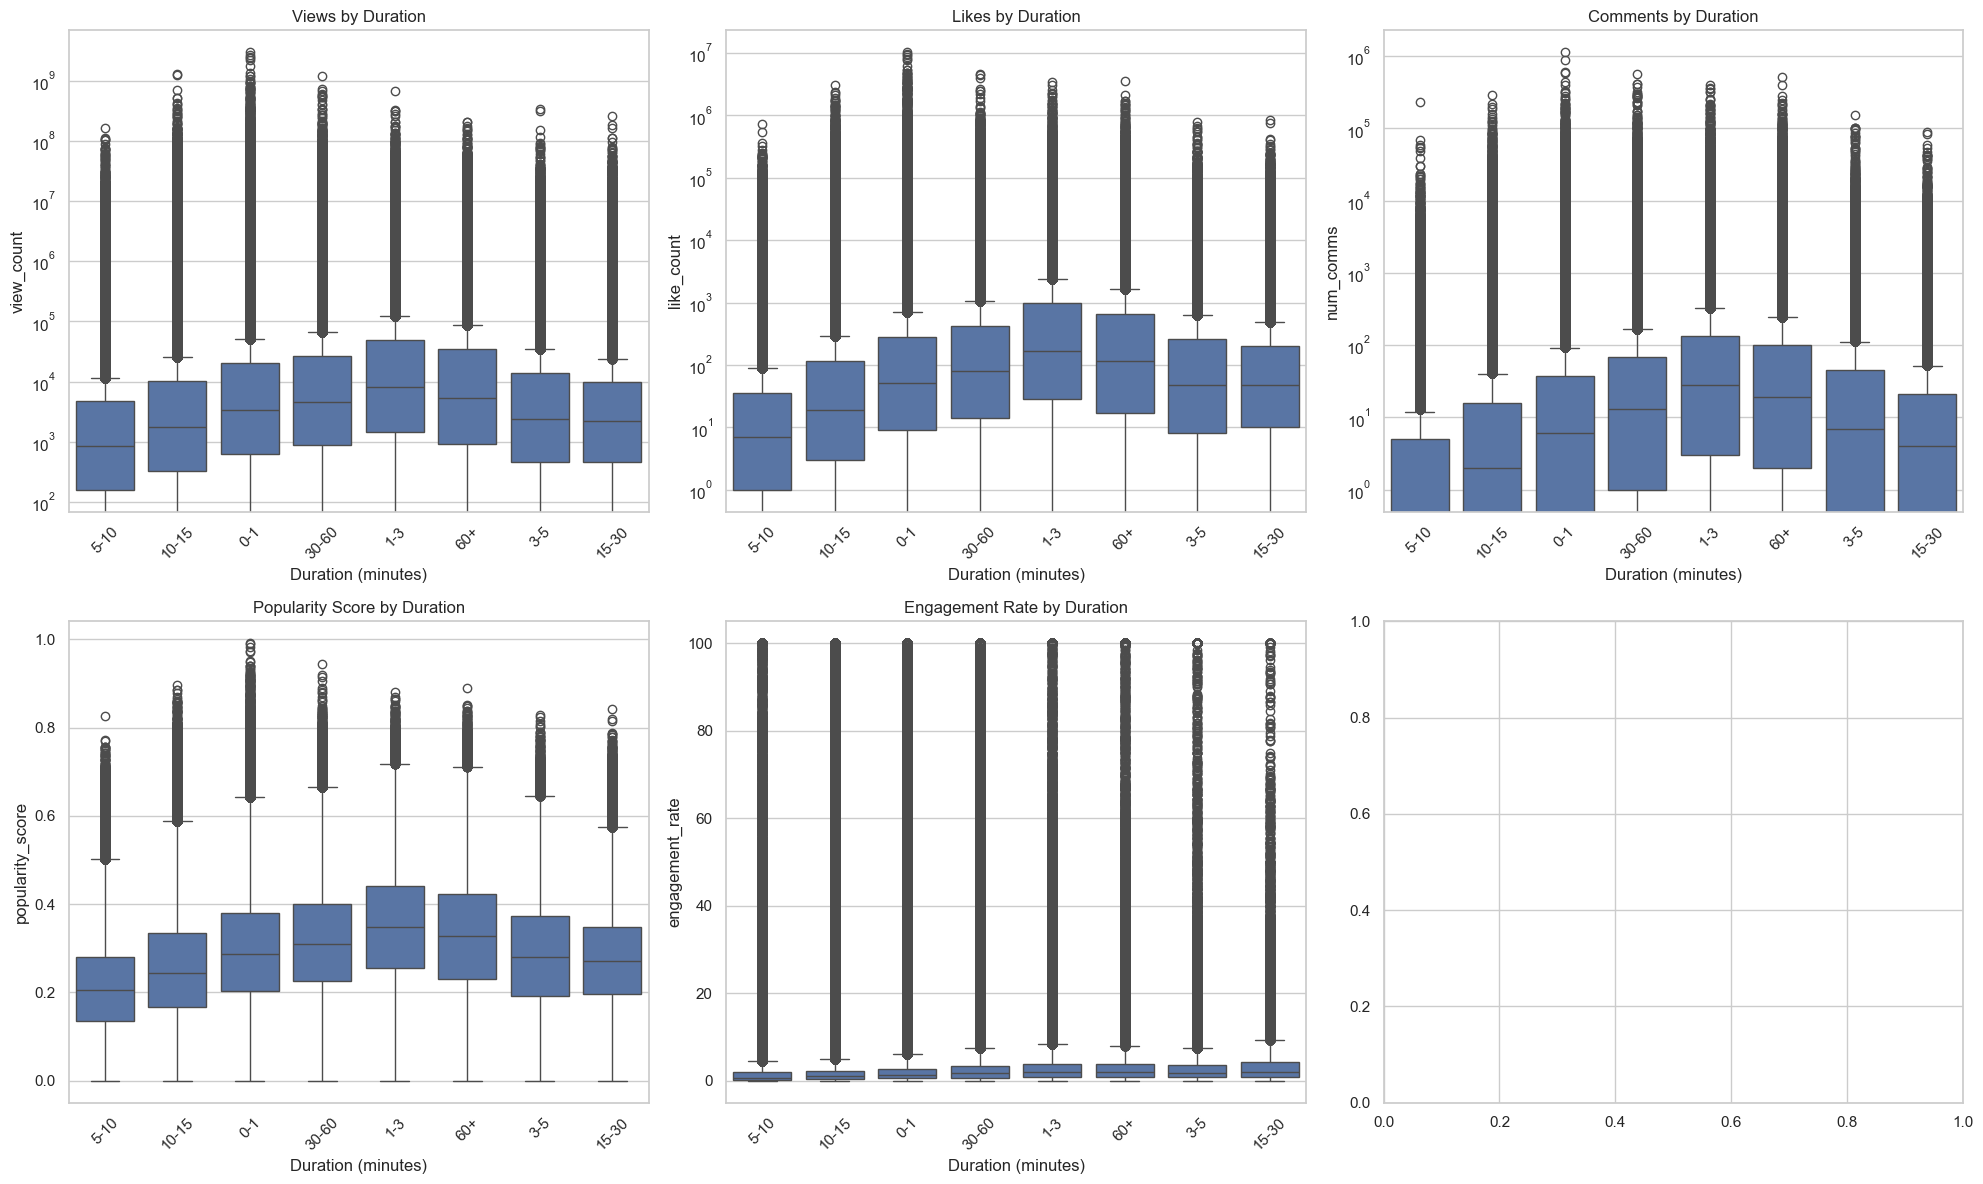

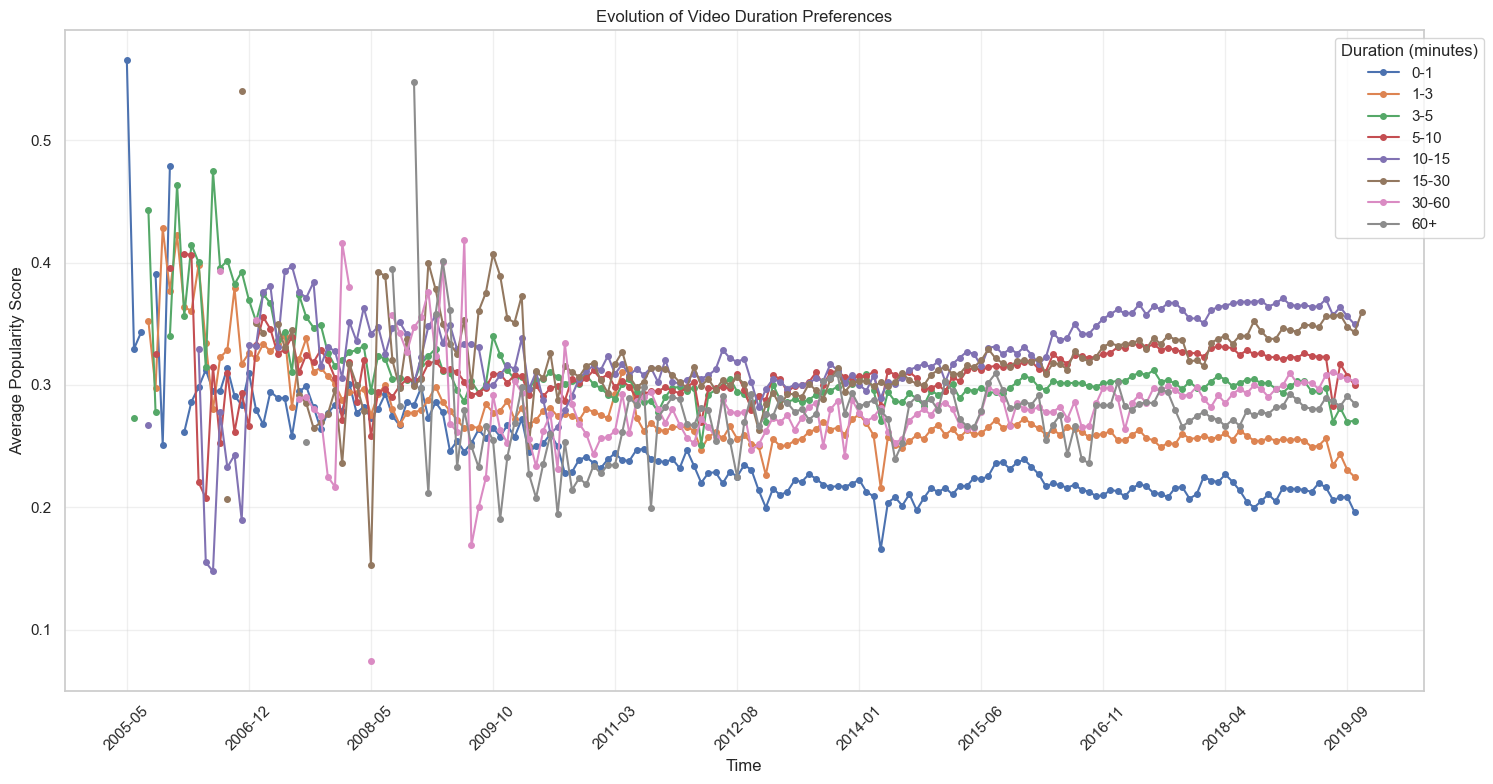

In [22]:
from src.utils.duration import analyze_duration_metrics, plot_engagement_metrics, analyze_temporal_trends

# Run analysis
df_analysis = analyze_duration_metrics(df_metadata, df_comments)
fig_engagement, stats = plot_engagement_metrics(df_analysis)
plt_trends = analyze_temporal_trends(df_analysis)

**Impact of video length on viewer engagement and channel growth**

Overall data from 2005 to 2019 showed that shorter videos (1-3 minutes) and longer videos (30-60 minutes, over 60 minutes) typically achieve better playback effects and relatively higher audience engagement. In addition, although 15-30 minute videos do not have the highest audience engagement compared to videos of other durations, the average audience engagement performance is better.

**Evolution of audience preferences for video length over time**

Since 2016, the average popularity scores of different video lengths have gradually become distinguishable. Videos of 10-15 minutes and 15-30 minutes have more advantages. On the contrary, shorter videos of 0-1 minutes and 1-3 minutes perform the worst on YouTube.

### *Why our plan is reasonable and sound?*

Based on the above research, we can summarize the reasons why our plan is reasonable and sound:
1. **Data-driven Approach**
    - Comprehensive dataset analysis of YouTube metadata, timeseries, comments and channels
    - Rich insights into content strategy, video duration and engagement
    - Cross-validation through multiple data sources
2. **Progressive Analysis Layers**
    - From single metrics to multi-dimensional analysis
    - From overall trends to category-specific comparisons
    - Dual validation through visualization and statistics
3. **Rigorous Methodology**
    - ANOVA testing ensures statistical reliability
    - Composite scoring system balances multiple metrics
    - Time-series analysis captures temporal evolution
4. **Analysis Comprehensiveness**
    - Cross-dataset validation
    - Multiple performance metrics covered
    - Major content categories analyzed


### *Further Analysis in P3*
1. **Diversity Outlier Investigation**
    - Analyze highly successful diversified channels
    - Study their unique strategies and characteristics
    - Compare with specialized channels in similar categories
    - Identify key differentiating factors

2. **Major Event Impact Analysis**
    - Select years with significant industry events
    - Track video duration trends before and after
    - Study impact across different content types
    - Example: How gaming livestream emergence affected gaming video length

3. **Diversity-Duration Interaction Effects**
    - Build multiple regression models
    - Analyze optimal duration at different diversity levels
    - Study how duration moderates diversification strategy effectiveness
    - Identify optimal combinations

These directions could deepen current findings and reveal more YouTube content operation patterns.

# Frequency analysis of for time series

In this section, we focus on analyzing the time series from frequency perspective. Through time domain, the time series of different feature seems random and changes rapidly. However, it may contain some trends and periodical properties. For example, people tend to spend more time on Youtube at weekend, which arouses a slight peak in time domain. It indicates a periodical component of the time series. Remember, every time signal can be divided into the summation of multiple sine functions with different magnitude and frequency. That's the very idea of fourier transform. Another interesting point is that discreet periodical time signal means that its frequency spectrum is still discreet and periodical, but it is not valid for our complexed time signal with random shape. But through frequency analysis, we may find out whether there is a periodical component, a general trend, a seasonal difference, etc.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Import data
df_id= pd.read_csv('./data/channel_ids_sampled.csv')
df_channels = pd.read_feather('./data/df_channels_en_sampled.feather')
df_timeseries = pd.read_feather('./data/df_timeseries_en_sampled.feather')
df_comments = pd.read_feather('./data/num_comments_sampled.feather')
df_metadata = pd.read_feather('./data/yt_metadata_en_sampled.feather')

In [6]:
# Substract time series of views
df_timeseries_views = df_metadata[['categories', 'display_id', 'view_count', 'upload_date']].copy()
df_timeseries_Gaming = df_timeseries_views[df_timeseries_views.loc[:,'categories'].isin(['Gaming'])]

# Transform 'upload_date' to datatime type
df_timeseries_Gaming.loc[:,'upload_date'] = pd.to_datetime(df_timeseries_Gaming['upload_date'])

# Transform date to period with 5 categories 
df_timeseries_Gaming.loc[:,'Day'] = df_timeseries_Gaming['upload_date'].dt.to_period('D')
df_timeseries_Gaming.loc[:,'Week'] = df_timeseries_Gaming['upload_date'].dt.to_period('W')
df_timeseries_Gaming.loc[:,'Month'] = df_timeseries_Gaming['upload_date'].dt.to_period('M')
df_timeseries_Gaming.loc[:,'Season'] = df_timeseries_Gaming['upload_date'].dt.to_period('Q')
df_timeseries_Gaming.loc[:,'Year'] = df_timeseries_Gaming['upload_date'].dt.to_period('Y')

# Choose Gaming for example, and group it by 'Day'
df_timeseries_Gaming_views = df_timeseries_Gaming.loc[:,['view_count', 'Day']].groupby('Day').agg(
    view_mean=('view_count', 'mean'),
    view_sum=('view_count', 'sum')
).reset_index()

# Transform 'Day' to timestamp for plotting
df_timeseries_Gaming_views.loc[:,'Day'] = df_timeseries_Gaming_views.loc[:,'Day'].dt.to_timestamp()

C:\Users\Y9000P\AppData\Local\Temp\ipykernel_25612\1548816719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_Gaming.loc[:,'Day'] = df_timeseries_Gaming['upload_date'].dt.to_period('D')
C:\Users\Y9000P\AppData\Local\Temp\ipykernel_25612\1548816719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_Gaming.loc[:,'Week'] = df_timeseries_Gaming['upload_date'].dt.to_period('W')
C:\Users\Y9000P\AppData\Local\Temp\ipykernel_25612\1548816719.py:11: SettingWithCopyWarning: 
A value 

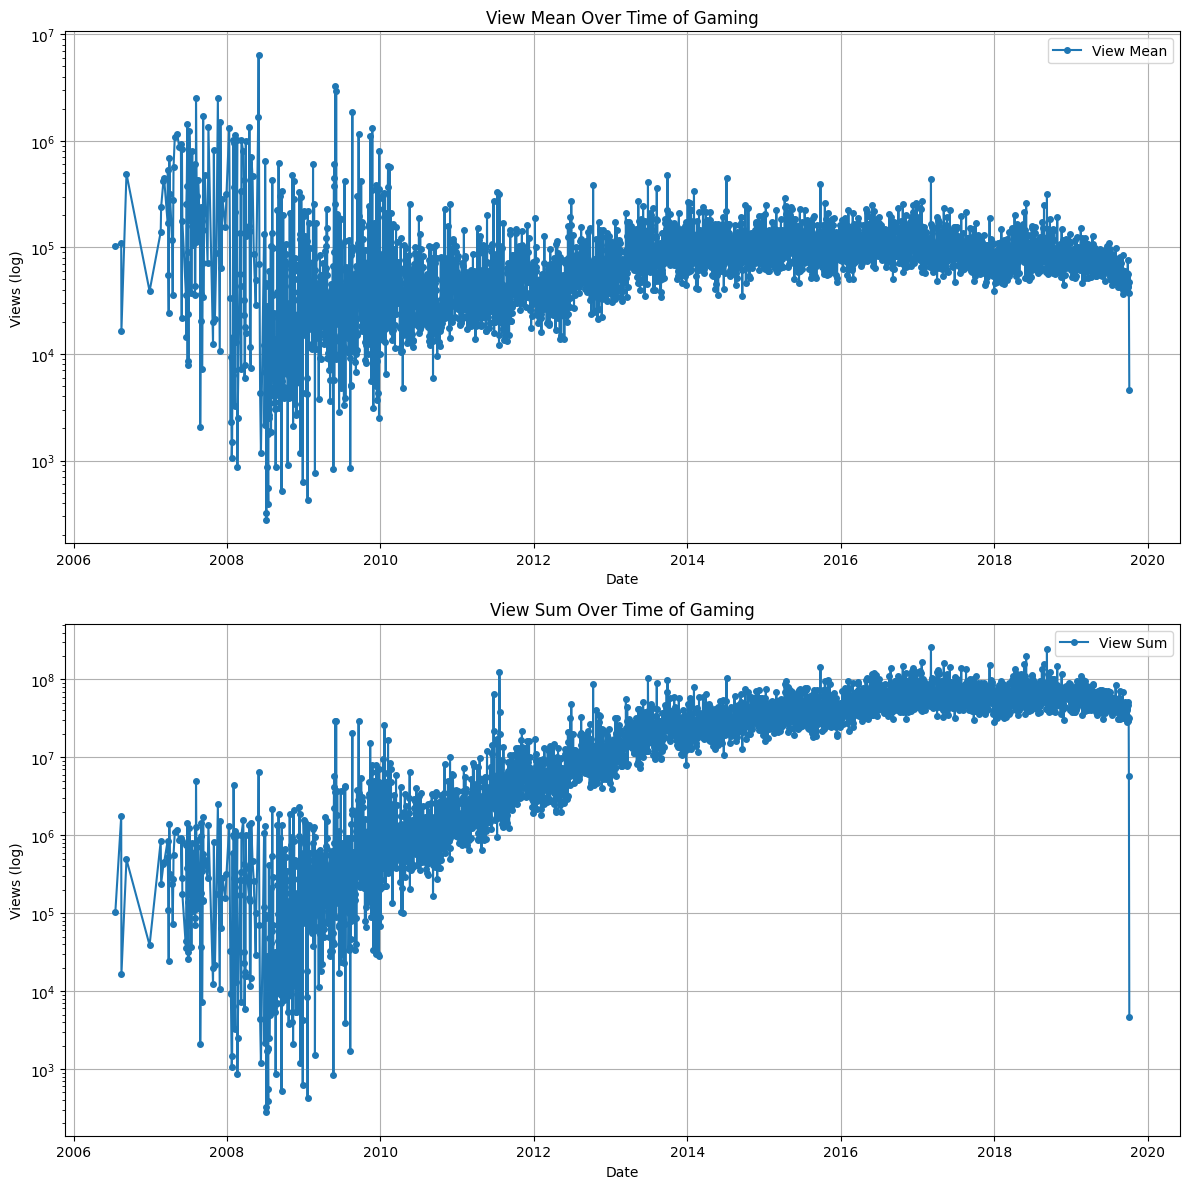

In [7]:
# Visualize the mean and sum of views over time
def df_timeseries_plot_time_domain(df_timeseries_Gaming_views, *args):
    view_label = ['View Mean', 'View Sum']
    plt.figure(figsize=(12, 12))
    for i in range(2):  
        plt.subplot(2, 1, i + 1, )  
        plt.plot(df_timeseries_Gaming_views['Day'], df_timeseries_Gaming_views.iloc[:, i+1], label=view_label[i], marker='o', markersize=4)
        if len(args) > 0:
            df_timeseries_Gaming_views_filtered = args[0]
            plt.plot(df_timeseries_Gaming_views_filtered['Day'], df_timeseries_Gaming_views_filtered.iloc[:, i+1], label=f"smoothed {view_label[i]}", linestyle='-', color='red', markersize=4)
        plt.yscale('log')  
        plt.xlabel("Date")
        plt.ylabel("Views (log)")
        plt.title(f"{view_label[i]} Over Time of Gaming")
        plt.legend()
        plt.grid()
    plt.tight_layout()
    plt.show()
    
df_timeseries_plot_time_domain(df_timeseries_Gaming_views)

Well, although it looks like a mess, it is enough for us to get an overall sketch. The mean of views of Gaming fluactuated over a decade, and it shows a descending trend starting from 2019. For sum of views, it had a strong increasing and tended to be stable around 10e8 (also a slight decreasing trend). However, there are several points that don't belong here. Besides, it's better to cut a period to obtain more details at first.

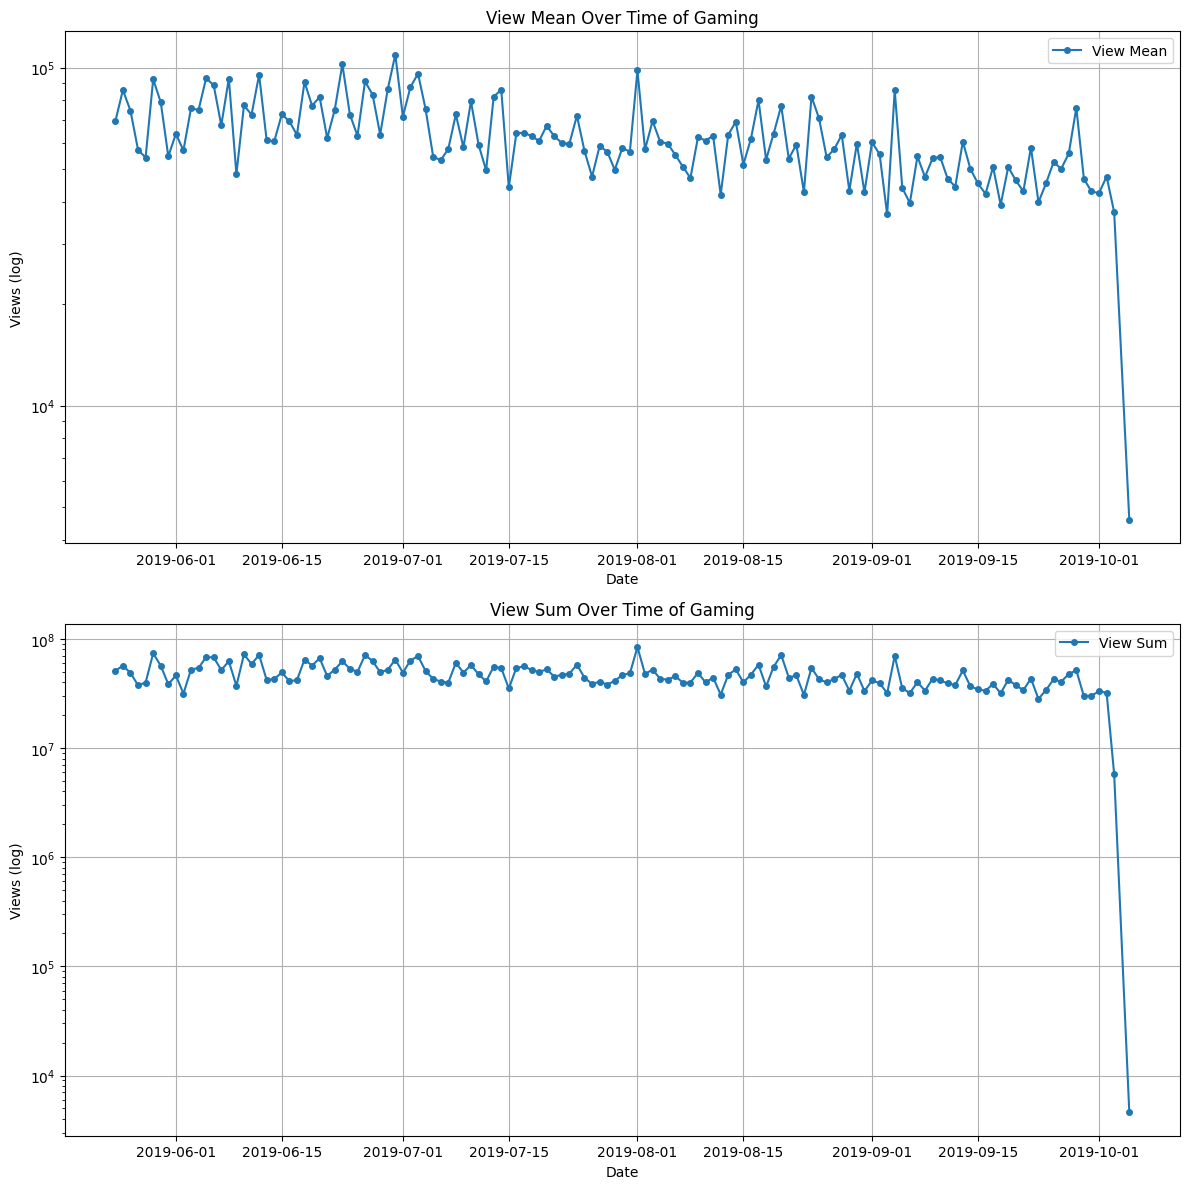

In [8]:
# Cut the last season's data and plot
df_timeseries_plot_time_domain(df_timeseries_Gaming_views.iloc[4100:])

# Drop the last 2 points
df_timeseries_Gaming_views = df_timeseries_Gaming_views.iloc[:4232]


**Filter the signal and make it smooth**

Then we introduce the finite impluse response (FIR) filter to process the signal. By doing a convolution between the signal and a square impulse response, the high frequency components are removed and thus the signal can be smooth. But because the convolution brings the front and end tails, so we have to cut the middle part of the output to maintain the identity.

P.S. Smoothness depends on filter_order and cutoff_frequency.

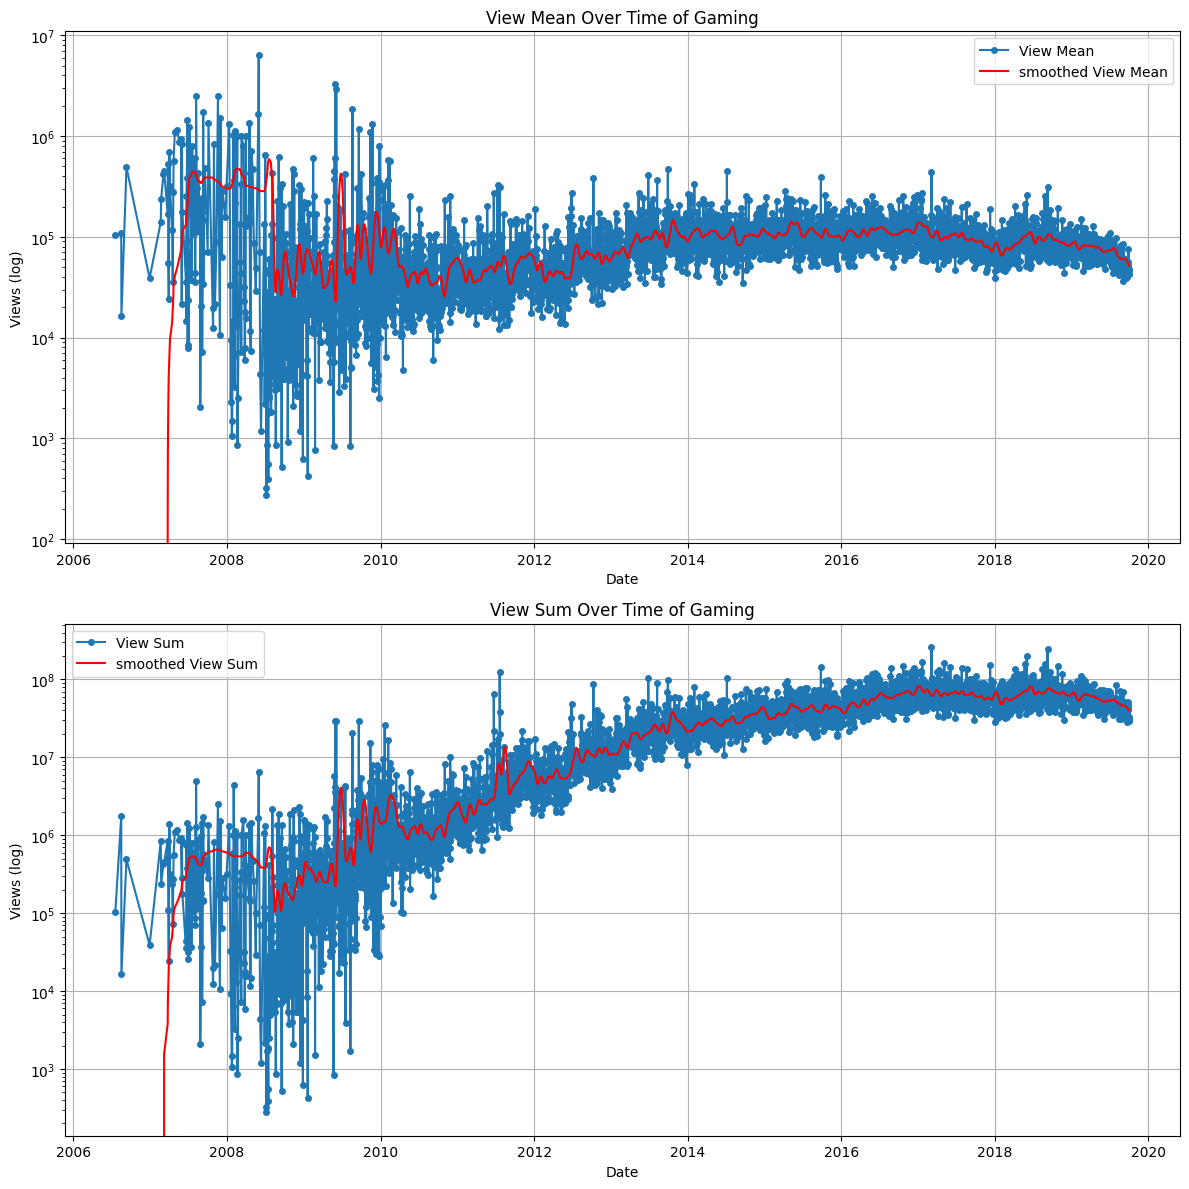

In [9]:
from scipy import signal

def signal_FIR(df_timeseries_Gaming_views, column):
    signal_no_filtered = df_timeseries_Gaming_views.loc[:, column]
    filter_order = 51  # total length of FIR
    cutoff_frequency = 0.05  # between 0 and 1
    fir_filter = signal.firwin(filter_order, cutoff_frequency)
    signal_filtered = signal.lfilter(fir_filter, 1.0, signal_no_filtered) # lfilter has cut the tails
    return signal_filtered

df_timeseries_Gaming_views_filtered = pd.DataFrame({'Day':df_timeseries_Gaming_views['Day'], 
                                                    'view_mean':signal_FIR(df_timeseries_Gaming_views, 'view_mean'),
                                                    'view_sum':signal_FIR(df_timeseries_Gaming_views, 'view_sum')})

df_timeseries_plot_time_domain(df_timeseries_Gaming_views, df_timeseries_Gaming_views_filtered)

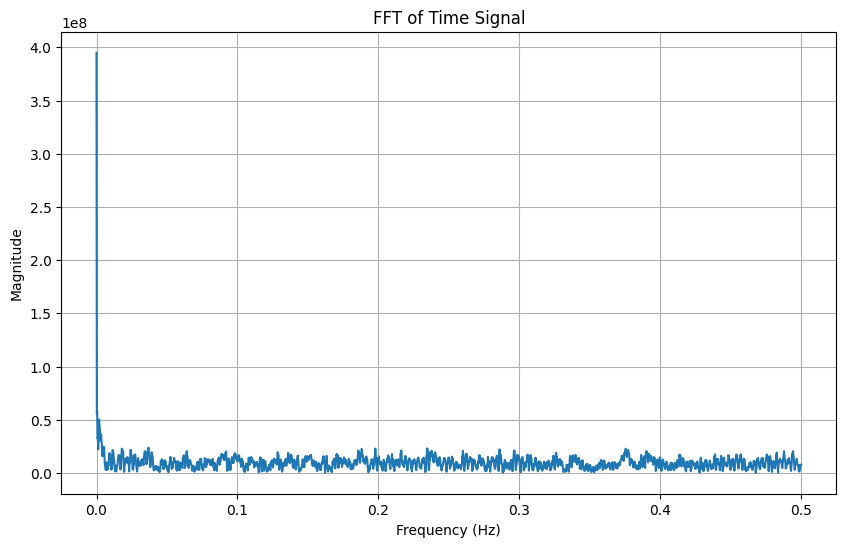

In [10]:
# fft
def signal_fft(signal, sampling_rate, *args):
    if len(args) > 0:
        DC_flag = args[0]
        # If true, minus mean to reduce 0-frequency (DC) components
        if DC_flag == True:
            signal = signal - np.mean(signal)
    fft_result = np.fft.fft(signal)
    n = len(signal)
    # Obtain frequency and magnitude
    frequencies = np.fft.fftfreq(n, d=sampling_rate)
    magnitude = np.abs(fft_result)
    # Because the signal is real-valued, its spectrum is symmetrical.
    # Choose positive side 
    positive_frequencies = frequencies[:n // 2]
    positive_magnitude = magnitude[:n // 2]
    return fft_result, positive_magnitude, positive_frequencies

# Plot frequency spectrum
def plot_fft(positive_magnitude, positive_frequencies, *args):
    plt.figure(figsize=(10, 6))
    if len(args) > 0:
        min_freq_percentage = args[0]
        max_freq_percentage = args[1]
        min_cut_point = np.floor(min_freq_percentage*len(positive_magnitude)).astype(int)
        max_cut_point = np.floor(max_freq_percentage*len(positive_magnitude)).astype(int)
        plt.plot(positive_frequencies[min_cut_point:max_cut_point], positive_magnitude[min_cut_point:max_cut_point])
        plt.title('FFT of Smoothed Time Signal')
    else:
        plt.plot(positive_frequencies, positive_magnitude)
        plt.title('FFT of Time Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    # plt.show()

# Take view_mean for example
# Note that the signal has not been transformed by fft.
fft, magn, freq = signal_fft(df_timeseries_Gaming_views['view_mean'], 1)
ax = plot_fft(magn, freq)

Surprisingly, we find out that there is a 0-frequency component that is dominant, which can be treated as a DC bias in the circuit. It may indicate two things: 1. Our signal has a high mean value, which is mapped into 0 Hz point. 2. Our signal contains noise, which can be seen as the fluctuating bias of views. To alleviate the first question, we can substract the mean of our signal. For the second one, we may use FIR filter to equalize noise influence towards different frequency as much as we can. All in all, the noise is hard to deal with.

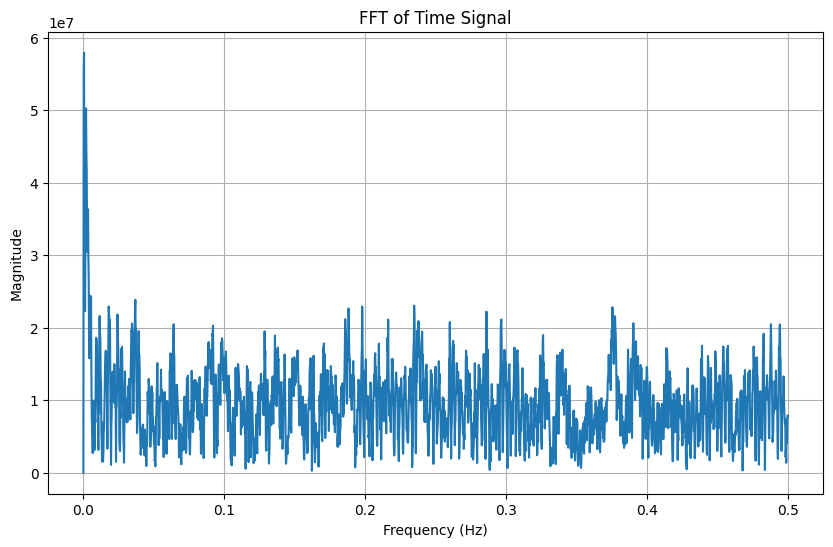

In [11]:
# Substract DC component
fft, magn, freq = signal_fft(df_timeseries_Gaming_views['view_mean'], 1, True)
plot_fft(magn, freq)

Now it's better. Recall our sampling rate is 1 Hz, which means we sample each point daily. Then if we want to know whether there is a periodical property, for example, weekly uprising, we need to pay attention to lower frequency point. The frequency of 0.2 Hz, 0.167 Hz, 0.143 Hz, and 0.125 Hz correspond to day 5, 6, 7, and 8. So we first use FIR filter and then focus on those area.

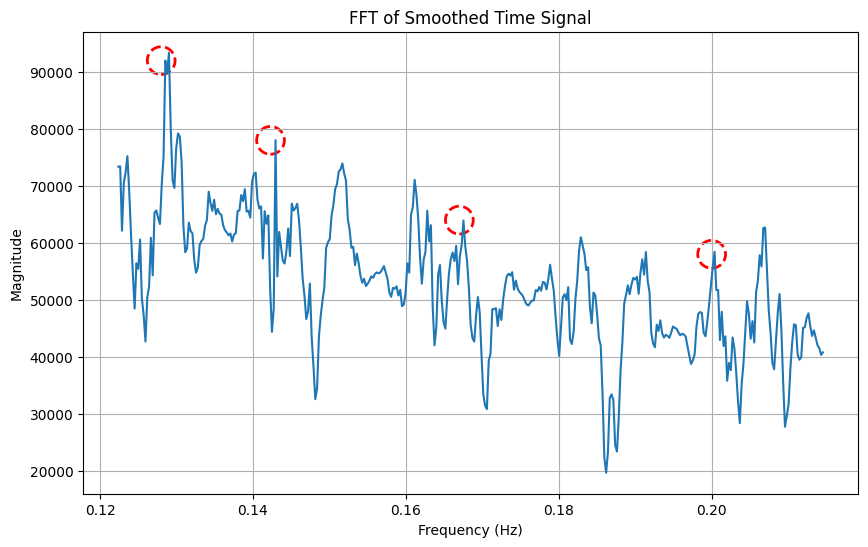

In [12]:
# Use FIR filter
fft, magn, freq = signal_fft(df_timeseries_Gaming_views_filtered['view_mean'], 1, True)
plot_fft(magn, freq, 0.245, 0.43)
plt.scatter([0.128, 0.1423, 0.167, 0.2], [92000, 78000, 64000, 58000], facecolor='none', edgecolor='red', s=400, marker='o', linewidth=2, linestyle='--', label='Highlights')
plt.show()

It shows that even there are some high frequency points around those 4 points, we might still detact a periodical component corresponding to around 1 week.

**STFT**

One drawback of FFT is that it assumes the signal is time-independent, i.e., the frequency components are not changing through the entire time period. But in reality, as we have so long time slot, the frequency may change when time flowing. Then the short-time Fourier transform (STFT) is used to cut the signal into short time segments, and then perform a Fourier transform on each segment. Thus it captures how the signal frequency changes over time.

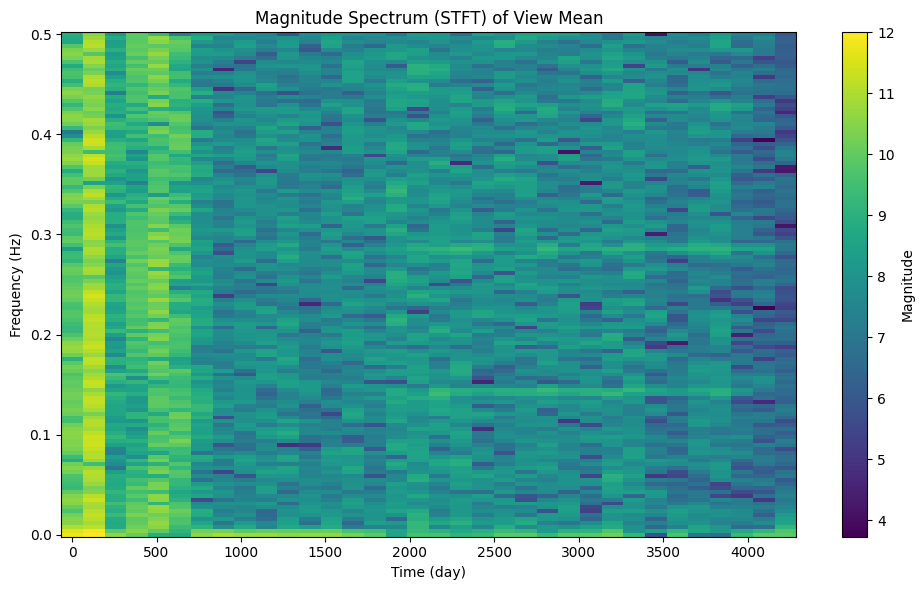

In [13]:
from scipy.signal import stft

def signal_stft(signal):
    signal = signal - np.mean(signal)
    # fs is sampling frequency, and nperseg is the width of the Window
    f, t, S = stft(signal, fs=1.0, nperseg=256)
    magnitude_spectrum = np.abs(S)
    # Use log scale to show more clear spectrum
    log_magnitude_spectrum = np.log1p(magnitude_spectrum)
    return f, t, magnitude_spectrum, log_magnitude_spectrum

def plot_spectrum(f, t, magnitude_spectrum):
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, magnitude_spectrum, shading='auto', cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.title('Magnitude Spectrum (STFT) of View Mean')
    plt.xlabel('Time (day)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

f, t, magnitude_spectrum, log_magnitude_spectrum = signal_stft(df_timeseries_Gaming_views['view_mean'])
plot_spectrum(f, t[:len(t)-1], log_magnitude_spectrum[:,:len(t)-1])

It illustrates that the high frequency components are fading away starting from reference "0" date. It may help us to pay more attention on the time series data since "1000" date. It is helpful for priodical property analyzing, aggression, and forecasting. 

By the way, when we focus on the right part of the spectrum, we find: starting from "1800" date, there are several relative high frequency lasting for the rest of time period (the bright green lines, around 0.13, 0.29, and 0.43 Hz). It may tell something.

# Time Series Fitting and Forecasting

Since we have already more insights of our time series, we want to build a routine, to fit and even forecast the views, likes, growth, ect. It will be worthy because not only can we get deeper understanding of our time series of Youtube world, but also can we modify our strategy to instruct youtubers by fitting and forecasting.

We come up with 3 approaches. 

### 1. FFT based Time Series Fitting and Forecasting

Based on FFT, our time series can be first manipulated by FFT. The high frequency components of theresult is filtered, and then we reconstruct our series by inverse FFT to get the low-frequency trend series. And once we have the frequency data, it is easier to forecast the behavior in time domain, as time signal can be extended. However, this method is powerful as long as the signal has distinct periodical features.

### 2. Seasonal Decomposition based Time Series fitting and Forecasting

To alleviate the drawback of the 1st method, we can use a classical model address it. Following the same methodology of FFT, it decomposes the time series into three parts, i.e., trend, periodical signal, and noise. The advantage of it lies on that it only performs periodical detaction for certain part, instead of other components. It makes sense because there are no periodicity on other parts, or, theirs are not clear enough. It also explains why 1st approach is only valid for the signal with strong periodicity. This method has multiple realization ways, such as, AutoRegressive Integrated Moving Average (ARIMA), Seasonal-Trend decomposition using LOESS (STL), and so on.
$$
T_{y} = T_{trend} + T_{season} + T_{noise}
$$
### 3. Sequence-to-Sequence based Time Series Forecasting

Using fft, regression, STL, ARIMA models might be enough to obtain a predictive result that is good enough for simple forecasting problems. However, as time series data gets more erratic and complicated, deep learning methods is playing a more and more important role in time series forecasting, since they make no assumption on the underlying patterns and are more robust to deal with noise in data. Sequence to Sequence Learning with Encoder-Decoder Neural Network techniques is actually a perfect fit for solving time series forecasting problems. Another advantage is that we can put all of our features (whether we think they contribute to our series or not) to the model, then it can put weights to the features automatically. However, this model may be less explainable, since it doesn't care about what kind of time data we use. But it can be omitted reasonably, for now, as long as it can make the job done:)

In [ ]:
# sns.set_style("whitegrid")
# plt.style.use('ggplot')

**FFT based time series fitting and forecasting**

Magnitude peak is at: [0.00030012 0.00060024 0.0015006  0.14285714 0.28571429] Hz


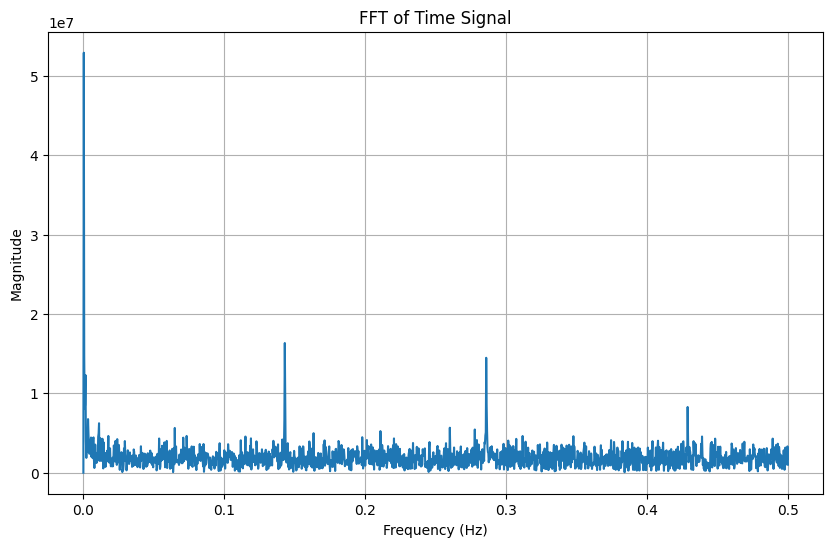

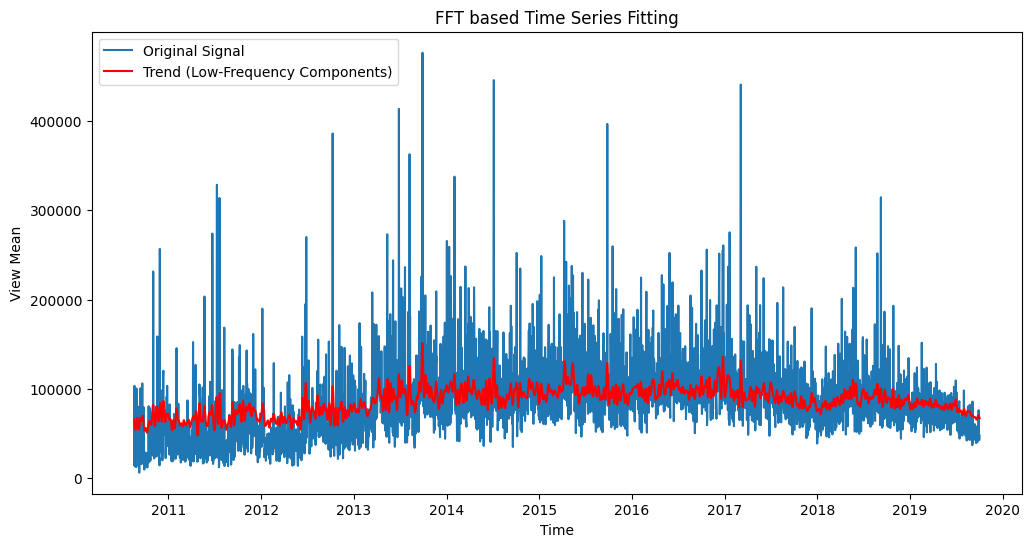

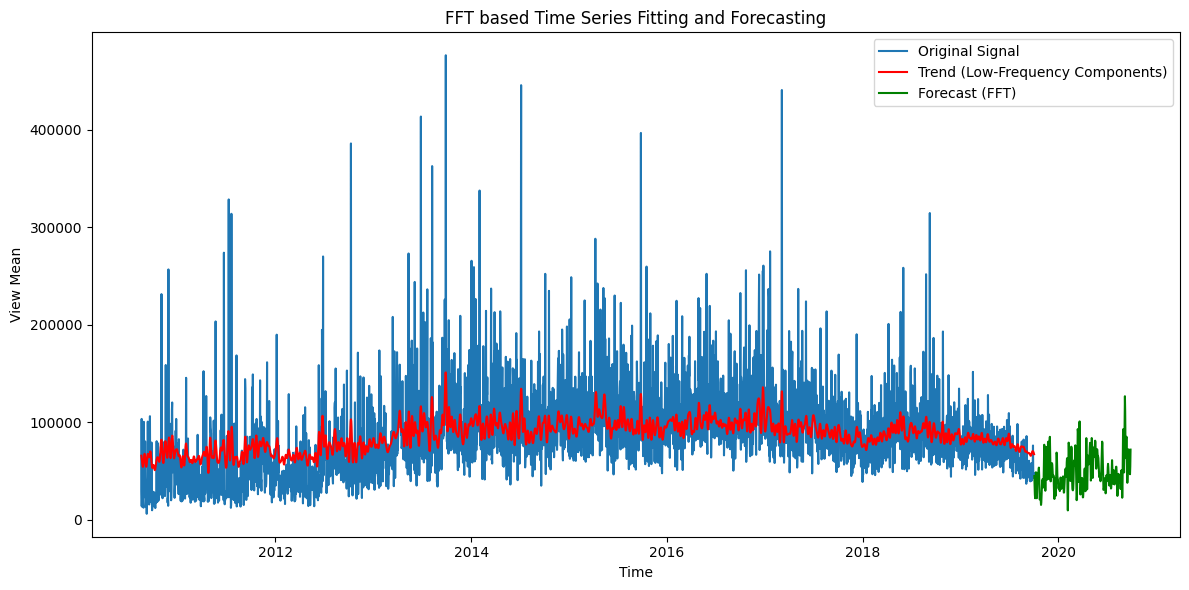

In [14]:
from scipy.fft import ifft

# Cut the front part (starting from around "1000" date)
df_timeseries_Gaming_views_cut = df_timeseries_Gaming_views[900:len(df_timeseries_Gaming_views)].copy()
df_timeseries_Gaming_views_filtered_cut = df_timeseries_Gaming_views_filtered[900:len(df_timeseries_Gaming_views_filtered)].copy()

# fft
fft, magn, freq = signal_fft(df_timeseries_Gaming_views_cut['view_mean'], 1, True)
plot_fft(magn, freq)
# fft, magn, freq = signal_fft(df_timeseries_Gaming_views_filtered_cut['view_mean'], 1, True)
# plot_fft(magn, freq)

# Detact peak
peak = [x > 1e7 for x in magn]
peak_index = np.where(peak) 
print(f"Magnitude peak is at: {freq[peak_index]} Hz")

# Filter high frequency components
# Since we know there is a periodical property in frequency domain, we choose threshold at 0.1428 Hz
def filter_high_frequency_components(fft, freq, threshold=0.143):
    filtered_high_fft = np.where(np.abs(freq) < threshold, fft, 0)
    return filtered_high_fft

# ifft
def inverse_fft(filtered_high_fft, signal_length):
    reconstructed_signal = ifft(filtered_high_fft, n=signal_length)
    return np.real(reconstructed_signal)

# Plot the two signals together
def plot_fft_fit(time, original_signal, trend_signal):
    plt.figure(figsize=(12, 6))
    plt.plot(time, original_signal, label='Original Signal')
    plt.plot(time, trend_signal, label='Trend (Low-Frequency Components)', color='red')
    plt.xlabel('Time')
    plt.ylabel('View Mean')
    #plt.grid()
    plt.legend()
    plt.title('FFT based Time Series Fitting')
    plt.show()

# Forecast
def forecast_fft(filtered_high_fft, predict_day):
    # filtered_high_fft[0] = 0
    # extended_fft = np.tile(filtered_high_fft, predict_day//len(filtered_high_fft) + 1)
    future_fft = filtered_high_fft
    future_signal = np.fft.ifft(future_fft).real[:predict_day]
    return future_signal

# Plot forecast signal
def plot_fft_forecast(time, predict_day, future_signal, original_signal, trend_signal):
    plt.figure(figsize=(12, 6))
    plt.plot(time, original_signal, label='Original Signal')
    plt.plot(time, trend_signal, label='Trend (Low-Frequency Components)', color='red')
    future_dates = pd.date_range(df_timeseries_Gaming_views_filtered['Day'].iloc[-1] + pd.Timedelta(days=1), periods=predict_day, freq='D')
    plt.plot(future_dates, future_signal, label="Forecast (FFT)", color='green')
    plt.xlabel('Time')
    plt.ylabel('View Mean')
    plt.legend()
    plt.title('FFT based Time Series Fitting and Forecasting')
    #plt.grid()
    plt.tight_layout()
    plt.show()

filtered_high_fft = filter_high_frequency_components(fft[:len(df_timeseries_Gaming_views_cut)//2], freq, 0.1)
fitting_signal = inverse_fft(filtered_high_fft, len(df_timeseries_Gaming_views_cut))
fitting_signal = fitting_signal + np.mean(df_timeseries_Gaming_views_cut['view_mean'])
plot_fft_fit(df_timeseries_Gaming_views_cut['Day'], df_timeseries_Gaming_views_cut['view_mean'], fitting_signal)

predict_day = 360
future_signal = forecast_fft(filtered_high_fft, predict_day)
future_signal = future_signal + np.mean(df_timeseries_Gaming_views_cut['view_mean'])
plot_fft_forecast(df_timeseries_Gaming_views_cut['Day'], predict_day, future_signal, df_timeseries_Gaming_views_cut['view_mean'], fitting_signal)


We first pay attention to the first figure. After we cut the time series starting around "1000" date, we then can distinctly see several peaks in frequency spectrum. The third frequency point "0.1428 Hz" is excatly "1/7", which mean there is a one-week periodicity in our time series. In practice, people tend to spend more time on watching Youtube videos. Thus, the average views in Gaming has a one-week periodicity.

Then, we filter the frequency signal and use the low-frequency components to plot the trend. Note that we set the threshold frequency according to our "one-week periodicity" assumption, i.e., cutting off at 0.143 Hz. 

Following this methodology, we extend the date to forecast by re-using fft results and extending it periodically. However, it strongly depends on the periodicity. It means if we don't have a distinct periodicity, we can't predict it (we're only capable to fit it). Another problem is that when time flows, the periodicity may change, and this method doesn't consider "trend" in time series. 

**Seasonal Decomposition of Time Series and ARIMA forecasting**

Here we implement STL model to achieve our goal. The time series signal is decomposed into three components: trend, season and noise(residual). STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components. The "robust" parameter controls whether the model places equal weights on all observations so that it can produce smaller errors, on average.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.stattools import adfuller

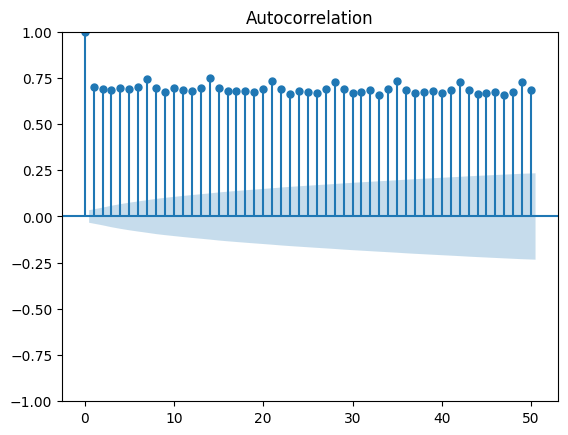

In [ ]:
# We choose view_sum to do the fitting and forecasting, as it has a more clear trend.
df_timeseries_Gaming_views_stl = df_timeseries_Gaming_views.iloc[900:].copy()
data = df_timeseries_Gaming_views_stl['view_sum']

# Plot autocorrelation to detact the period
plot_acf(data, lags=50) 
plt.show()

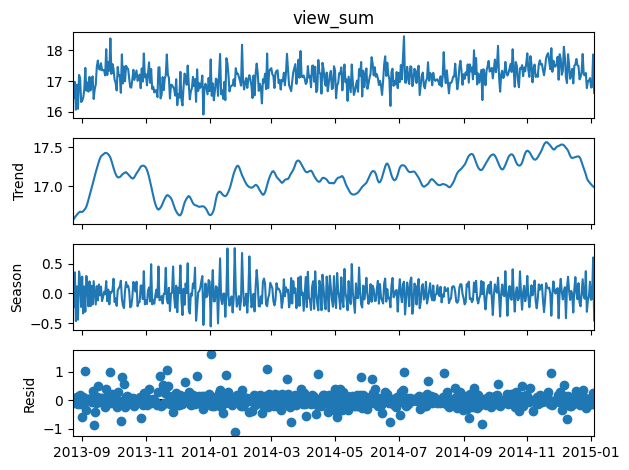

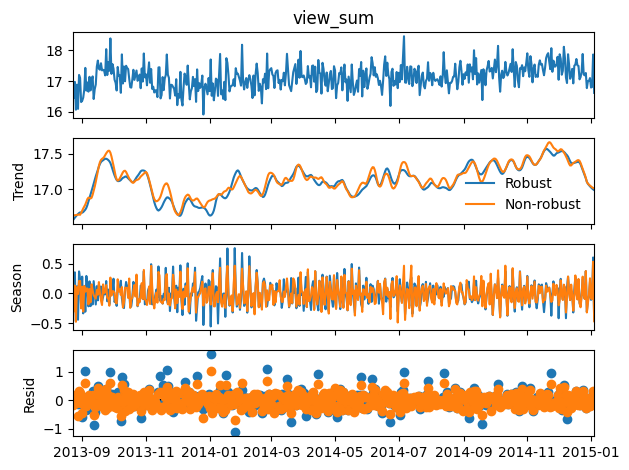

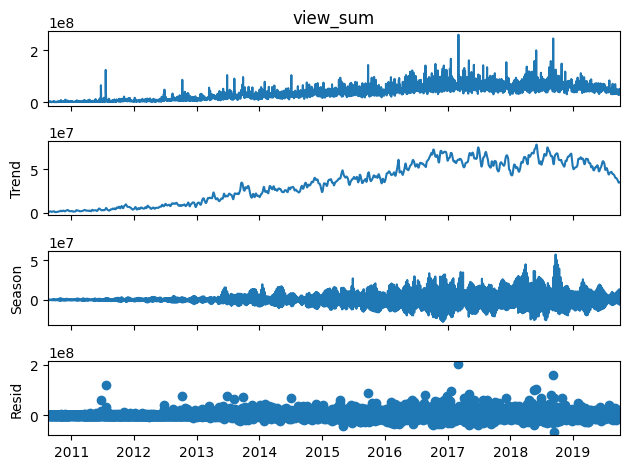

In [ ]:
# Focus on a portion of the signal for example
df_timeseries_Gaming_views_stl_cut = df_timeseries_Gaming_views.iloc[2000:2500].copy()

# STL setting
df_timeseries_Gaming_views_stl_cut['Day'] = pd.to_datetime(df_timeseries_Gaming_views_stl_cut['Day'])
df_timeseries_Gaming_views_stl_cut.set_index('Day', inplace=True)
df_timeseries_Gaming_views_stl_cut = df_timeseries_Gaming_views_stl_cut.asfreq('D')

# Use log scale
df_timeseries_Gaming_views_stl_cut['view_sum'] = df_timeseries_Gaming_views_stl_cut['view_sum'].apply(np.log)

# Period is 7, so we set seasonal as 7
stl = STL(df_timeseries_Gaming_views_stl_cut['view_sum'], seasonal=7, robust=True)
res = stl.fit()
fig = res.plot()

# Compare the robustness
def add_stl_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(df_timeseries_Gaming_views_stl_cut['view_sum'], period=7, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df_timeseries_Gaming_views_stl_cut['view_sum'], period=7, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

# Focus on the overall time series
# STL setting
df_timeseries_Gaming_views_stl['Day'] = pd.to_datetime(df_timeseries_Gaming_views_stl['Day'])
df_timeseries_Gaming_views_stl.set_index('Day', inplace=True)
df_timeseries_Gaming_views_stl = df_timeseries_Gaming_views_stl.asfreq('D')

# Period is 7, so we set seasonal as 7. Robust=False puts equal weights on all observations
stl = STL(df_timeseries_Gaming_views_stl['view_sum'], seasonal=7, robust=True)
stl_res = stl.fit()
fig = stl_res.plot()

After we decompose the time series into three parts, we can use the 'trend' term to forecast, with the help of ARIMA model. Because the trend component is always smooth and appropriate. The ARIMA model can be expressed as follow
$$
y_{t} = c + \phi_{1}y_{t-1} + \cdots + \phi_{p}y_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t},
$$
where $y_{t}$ is the differential series. The right terms denote the delayed components and delayed error of $y_{t}$. The parameters $p, d,$ and $q$ are the order of autoregressive model, differential order, and order of moving average model, respectively.

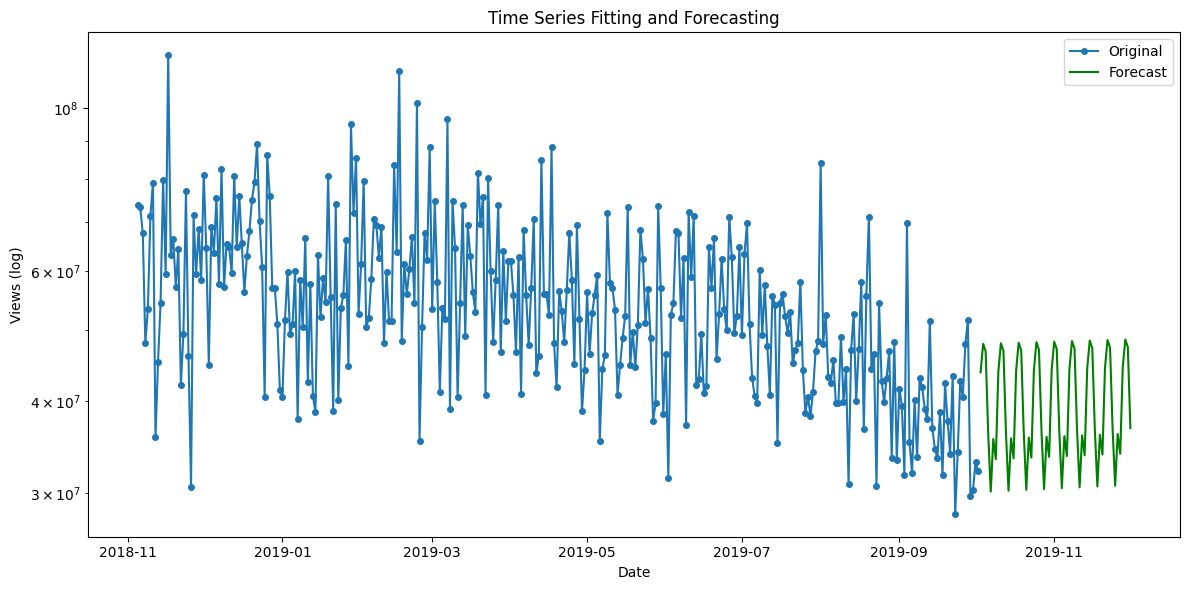

In [ ]:
def df_timeseries_plot_time_domain_forecast(df_ori, df_fit, predict_day, df_forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(df_ori['Day'], df_ori['view_sum'], label='Original', marker='o', markersize=4)
    if isinstance(df_fit, pd.DataFrame):
        plt.plot(df_fit['Day'], df_fit['view_sum_trend'], label='Trend', color='red', linestyle='-', markersize=4)
    future_dates = pd.date_range(df_ori['Day'].iloc[-1] + pd.Timedelta(days=1), periods=predict_day, freq='D')
    plt.plot(future_dates, df_forecast['view_sum_trend_forecast'], label="Forecast", color='green')
    plt.yscale('log')  
    plt.xlabel("Date")
    plt.ylabel("Views (log)")
    plt.title("Time Series Fitting and Forecasting")
    plt.legend()
    # plt.grid()
    plt.tight_layout()
    plt.show()

# Use STLForecast to forecast
stlf = STLForecast(df_timeseries_Gaming_views_stl['view_sum'], ARIMA, model_kwargs=dict(order=(1, 1, 1), trend="t"), period=7)
stlf_res = stlf.fit()
predict_day = 60
forecast = stlf_res.forecast(predict_day)
df_forecast = pd.DataFrame(forecast).reset_index()
df_forecast.columns = ['Day', 'view_sum_trend_forecast']
# plt.plot(df_timeseries_Gaming_views_stl['Day'], df_timeseries_Gaming_views_stl['view_sum'], label='Original', marker='o', markersize=4)

df_timeseries_plot_time_domain_forecast(df_timeseries_Gaming_views_stl.reset_index().iloc[3000:], {}, predict_day, df_forecast)

由于直接用stlf_res.forecast(predict_day)得到的预测结果不太理想，尝试下面独立配置训练ARIMA模型来预测，希望能有更多可配置性。

ADF Test Statistic: -1.5744274382566699
p-value: 0.49642542869489936
ADF Test Statistic (D): -14.27083550494429
p-value (D): 1.3752197643232096e-26


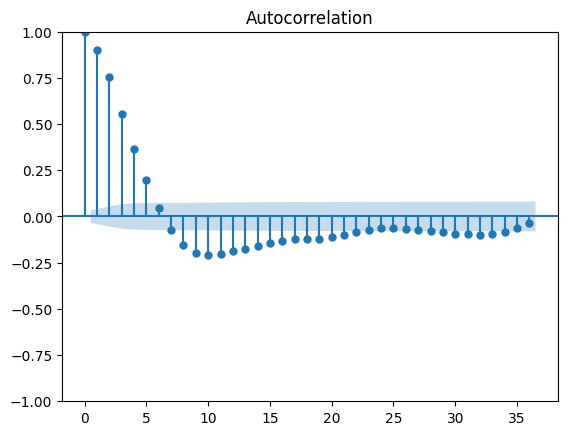

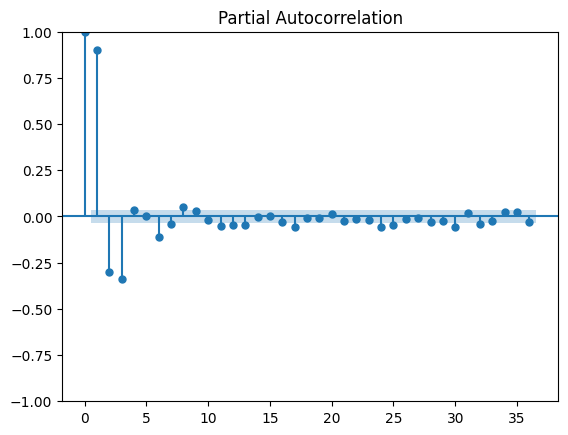

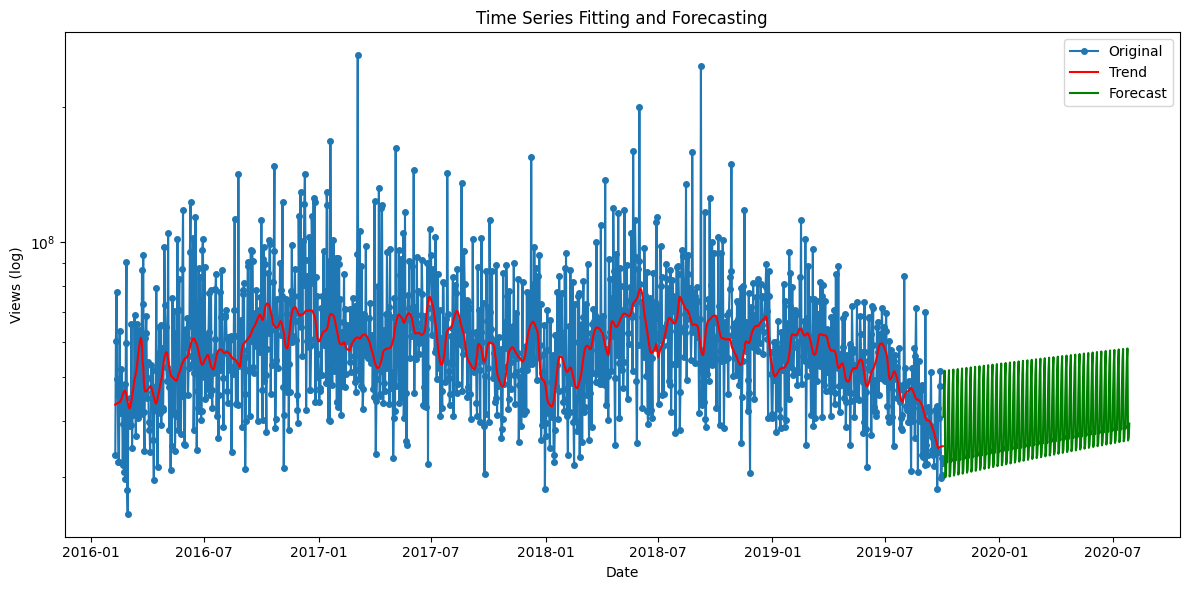

In [ ]:
# Extract the trend component
trend_component = stl_res.trend.dropna()

# Test stable status
adf_test = adfuller(trend_component)
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# If p-value > 0.05, we need differentiate it. Thus, d = 1
if adf_test[1] > 0.05:
    trend_component = trend_component.diff().dropna()
adf_test = adfuller(trend_component)
print("ADF Test Statistic (D):", adf_test[0])
print("p-value (D):", adf_test[1])

# Check the autocorrelation to decide p and q
plot_acf(trend_component)
plot_pacf(trend_component)
plt.show()

# Choose p=1, and q=1. Fit ARIMA
model_ARIMA = ARIMA(trend_component, order=(1, 1, 1))
model_ARIMA_fitting = model_ARIMA.fit()

# Forecast
predict_day = 300
trend_forecast_d = model_ARIMA_fitting.forecast(steps=predict_day)

# Construct df for trend
df_trend_component = pd.DataFrame(stl_res.trend.dropna())
df_trend_component = df_trend_component.reset_index()
df_trend_component.columns = ['Day', 'view_sum_trend']

# Obtain forecast value
trend_forecast = np.cumsum(trend_forecast_d) + df_trend_component['view_sum_trend'].iloc[-1]

# Add seasonal and noise components to forecasted data
seasonal_component = stl_res.seasonal[-7:]
noise_component = stl_res.resid[-7:]
full_forecast = trend_forecast + np.tile(seasonal_component, int(np.ceil(len(trend_forecast)/7)))[:len(trend_forecast)] + np.tile(noise_component, int(np.ceil(len(trend_forecast)/7)))[:len(trend_forecast)]

# Construct df for forecast data
df_trend_forecast = pd.DataFrame(full_forecast)
df_trend_forecast = df_trend_forecast.reset_index()
df_trend_forecast.columns = ['Day', 'view_sum_trend_forecast']

df_timeseries_plot_time_domain_forecast(df_timeseries_Gaming_views_stl.reset_index().iloc[2000:], df_trend_component.iloc[2000:], predict_day, df_trend_forecast)

Interestingly, if we just focus on the last tail of our time series signal, we probably say: the sum views will decrease. However, according our model, it is exactly opposite!

Even we now have some prediction results by two proposed models, we still don't know how much each feature has contributed to it.

**Sequence-to-Sequence based Time Series Forecasting**

In this section, we want to combine all of datasets to track the time features for each channel. 

First, we should re-think our features of each channel (unrelated features have been dropped). There are three main groups:

1. Time-independent features: category, engagement rate, diversity, main category ratio, category quantity, and video duration (mean, std, var..). These features are fixed during the whole time scale for each channel.

2. Time-dependent features: videos, delta videos, and activity. These features are varying at different timestamp. But it can be extended by more features that have not been derived, such as: if the day is weekend, if the day is holiday... (just by checking the calendar). All in all, these features are decided either by youtubers or the calendar, and provide time-varying information to the model.

3. Time-dependent outcomes: 
Aimming at fitting and forecasting the "outcome" features, such as views, delta-views, subscribers, delta-subscribers, dislikes, likes, and engagement rate. They are considered as the outcome of our model, because youtubers can't decide them simply by changing their own strategy.

Note that some time-independent features can be transformed into time-dependent features, such as diversity, and duration. Because they are computed based on df_metadata by mean or summation. But according to each video's uploaded time of each channel, they can be re-computed and then we will have more time-dependent features. For example, we can count the up-to-now diversity of each channel, or the mean duration of "n" recent videos, such that we can have more time-dependent features to describe the system. (Maybe someone could do it ^__^).

The main route is: 

1. Set an approriate time range to make sure each channel has the same timestamps. 

2. Treat all time-dependent, time-independent and some of outcomes features as the inputs of our model. 

3. Treat one of the "outcome" features as our target value for fitting and forecasting. 

4. Build training, validation, and test dataset. 

5. Train model.

6. Validation, fit, and predict.

The model:

Seq2Seq, short for Sequence-to-sequence learning, is about training models to convert sequences from one domain (e.g. sentences in English) to sequences in another domain (e.g. the same sentences translated to French). It has been widely used in Neural Machine Translation, Speech Recognition, Text Summarization,etc. However, seq2seq is also very helpful in solving time series forecasting problems, even though there is only a few applications. In the general case, time series prediction mainly depends on the learning of seasonality in data. Forecasting for a specific date will depends on not only learning one day's data but some weekly/yearly trends, as we did before. Therefore, seq2seq seems natural for this task, since we will predict the next value conditioned on the joint probability of the previous ones as well as our past predictions. 

Following this route, we choose LSTM RNN to implement it so that it is possible to generate "outcome" data given "input" data. In order to capture the whole information or changing pattern of the data in previous steps, we use RNN layer as "encoder" to process the raw input data into some representations of it, which "encodes" the information in the original input data. Then we use another RNN layer  as "decoder" to produce the expected output conditioned on the representations generated from the encoder layer. Besides, it is important to use "Teacher forcing" method to improve model skill and stability, since it will use the ground truth from a prior time step as input instead of using the best guess that has the maximum probability. Simply speaking, we use the real value of subscribers on each timestamp as the input for the next step prediction, instead of the "forecasted subscribers" of the model, which prevents the errors from being exaggerated. It is a common method in LSTM model. 

***Data Pre-procession***:

To ensure the same duration timestamps, we artificially set a range to cover more channels as much as possible, measured by qualified channel percentage.

In [ ]:
# Analyze df_timeseries to find the appropriate time range
df_timeseries_pre = df_timeseries.copy()
df_timeseries_pre['datetime'] = pd.to_datetime(df_timeseries_pre['datetime'])
df_channel_datetime = df_timeseries_pre.loc[:,['channel','datetime']].groupby('channel').agg(
    min_date = ('datetime', 'min'),
    max_date = ('datetime', 'max')
).reset_index()

In [ ]:
# Check the input date if it is within our desired time range
def check_dates(row, min_date, max_date):
    return row['min_date'] <= min_date and row['max_date'] >= max_date

min_date = pd.to_datetime('2016-10-17')
max_date = pd.to_datetime('2019-9-9 01:00:00')
df_channel_datetime['flag'] = df_channel_datetime.apply(lambda row: check_dates(row, min_date, max_date), axis=1)

# Show the percentage of our filtered data
ratio = df_channel_datetime['flag'].sum() / df_channel_datetime.shape[0]
print(f"valid channel ratio from {min_date} to {max_date}: {ratio}")

valid channel ratio from 2016-10-17 00:00:00 to 2019-09-09 01:00:00: 0.6248032971150244


Our target is to choose a good time range such that we have high time range as well as more data points. A possible range is from 2016-10-17 to 2019-09-09. Note that the datetime in df_timeseries is sampled with 7-day step.

Then we have 13633 channels in total, and we filter 62.5\% channels, i.e., 8338 channels.

In [ ]:
# Valid if each channel has the same time range
df_channel_datetime_filtered_channel = df_channel_datetime[df_channel_datetime['flag']]
df_timeseries_filtered = df_timeseries_pre.merge(df_channel_datetime_filtered_channel['channel'], on='channel')
def test(row, min_date, max_date):
    return row >= min_date and row <= max_date

# Each channel may have different time range, cut the tail time for each channel
df_timeseries_filtered = df_timeseries_filtered[df_timeseries_filtered['datetime'].apply(lambda row: test(row, min_date, max_date))]
print(df_timeseries_filtered.groupby('channel').agg(date_count=('datetime','count'))['date_count'].unique())

[152]


Okay, now we have a 1267376-timeseries dataset, with 8338 channels included, and 152 timestamps from 2016-10-17 to 2019-09-09 with 7-day as the step.

Next step is to merge the other time-independent features into it.


In [ ]:
df_metadata_pre = df_metadata.merge(df_channel_datetime_filtered_channel['channel'], left_on='channel_id', right_on='channel')

# fill missing values 
def fill_channel_means(df, columns_to_fill):
    """
    Fill NaN values in specified columns with the mean value of the same channel_id
    """
    # Create a copy to avoid modifying the original DataFrame
    df_filled = df.copy()
    
    # Calculate means for each channel_id
    channel_means = df.groupby('channel_id')[columns_to_fill].transform('mean')
    
    # Fill NaN values with channel means
    for col in columns_to_fill:
        df_filled[col] = df_filled[col].fillna(channel_means[col])
        
        # If any NaN values remain (for channels with all NaN values),
        # fill with the overall mean of the column
        if df_filled[col].isna().any():
            overall_mean = df[col].mean()
            df_filled[col] = df_filled[col].fillna(overall_mean)
    
    return df_filled

df_metadata_pre=fill_channel_means(df_metadata_pre, ['dislike_count','like_count' ,'view_count'])
display(pd.isna(df_metadata_pre).sum())

categories       0
channel_id       0
dislike_count    0
display_id       0
duration         0
like_count       0
upload_date      0
view_count       0
channel          0
dtype: int64

In [ ]:
# Calculate basic metrics grouped by channel
df_metadata_filtered = df_metadata_pre.groupby('channel_id').agg(
    duration_mean=('duration', 'mean'),
    duration_std=('duration', 'std'),
    view_mean=('view_count', 'mean'),
    likes_mean=('like_count', 'mean'),
    categories=('categories', lambda x: list(x))
).reset_index()


# Calculate engagement rate
df_metadata_filtered['engagement_rate'] = df_metadata_filtered['likes_mean'] / df_metadata_filtered['view_mean']

# Calculate category distribution and diversity (information entropy) for each channel
def calculate_diversity(categories):
    category_counts = pd.Series(categories).value_counts()
    proportions = category_counts / len(categories)
    return -np.sum(proportions * np.log(proportions))
    
df_metadata_filtered['diversity'] = df_metadata_filtered['categories'].apply(calculate_diversity)
df_metadata_filtered['num_categories'] = df_metadata_filtered['categories'].apply(lambda x: len(set(x)))
df_metadata_filtered['main_category'] = df_metadata_filtered['categories'].apply(lambda x: pd.Series(x).mode()[0])
df_metadata_filtered['main_category_ratio'] = df_metadata_filtered['categories'].apply(lambda x: pd.Series(x).value_counts().iloc[0] / len(x))

df_seq2seq_input = df_timeseries_filtered.merge(df_metadata_filtered, left_on='channel', right_on='channel_id')

***Input data structure:***

We are fitting the number of subscribers for 8338 channels on each week from 2016-10-17 to 2019-07-29 (146 days in total) using the time-independent and time-dependent features of each channel, and predicting the number of subscribers starting from 2019-08-05 to 2019-09-09 (6 days in total). (But since the scale of the dataset is too huge, it will cost much much time to train. We choose a smaller dataset to construct and validate our model for our first try.)

Eventually, we choose 70\%-80\% dataset for training and 20\%-30\% for validation, whose quantity are denoted as $N_r$ and $N_v$. For forecasting/testing, we choose the $N_t$ inputs data of the same channel dataset, which can be extended to further date either by their real data or randomly generation.

Therefore, we will need to reshape our training data into the input shape RNN requires, which is (samples, timesteps, features) corresponding to (batch_size, time_steps, input_dim).

<img src="./image/LSTM%20network.png" alt="LSTM Network" style="display: block; margin: auto;" />

As shown in the left figure, in traditional RNNs, the hidden state at each time step $h_t$ is updated based on the previous hidden state $h_{t-1}$ and the current input $X_t$. However, during the backpropagation process (where gradients are calculated and parameters are updated), the gradients are passed backward through each time step. If the sequence is long, the gradients (especially when using activation functions like sigmoid or tanh) tend to become very small, eventually approaching zero. This makes it difficult for the model to update the parameters for earlier time steps, leading to an inability to capture long-term dependencies. This is called the gradient vanishing problem.

<img src="./image/LSTM cell.png" alt="LSTM Network" style="display: block; margin: auto;" />

However, LSTM addresses this problem by introducing three "gates" and an additional states, refered as "Memory cell":

1. Forget Gate $W_f$: Decides which information should be forgotten. It outputs a value between 0 and 1 based on the current input and previous hidden state, representing how much of the previous memory should be retained. A value of 0 means forgetting completely, while 1 means retaining completely.

2. Input Gate $W_i$: Controls which new information should be added to the memory cell. It calculates a value based on the current input and previous hidden state, determining which information should be stored in memory.

3. Output Gate $W_o$: Decides how much of the memory cell’s information should be output as the hidden state (the model's output) at the current time step. It controls how much of the memory flows through to the output.

The forget gate, input gate, and output gate work together to guide the flow of information. The forget gate ensures that the model doesn't forget useful past information too early, the input gate adds useful new information, and the output gate controls how much of the memory cell's content is output. To keep the states of each gate, an additional state $C_{t}$ is introduced to store the long-term dependencies and update or retain memory selectively through the gates.

The hidden $H_{t+1}$ and cell $C_{t+1}$ states are calculated by:

$$H_{t+1} = \sigma(W_o, X_t, H_t) \times \tanh(W, C_{t+1})$$

$$C_{t+1} = C_{t} \times \sigma(W_f, X_t, H_t) + \sigma(W_i, X_t, H_t) \times \tanh(W_c, X_t, H_t)$$

The core of LSTM is the memory cell, which helps preserve long-term information and prevents it from being lost, which effectively combats the gradient vanishing problem. Therefore, it is recommanded to be adopted in our model, for time series fitting and forecasting. 

***Model structure:***

The model has two main parts: encoder and decoder. Taking training process as an example, the encoder takes input features of $N_t$ days and encode their hidden states through LSTM neural network into a fixed length vector. Then it passes the hidden states to decoder. Decoder, designed as 2 fully connected LSTM neural networks in this case, uses them with the features of $N_t$ days shifted 1 day forward to predict number of visitors per each channel in $t_{N_t+1}$. The LSTM layer is defined to return both sequences and state. The final hidden and cell states are ignored and only the output sequence of hidden states is referenced.

<img src="./image/model.png" alt="Model" style="display: block; margin: auto;" />

To decode our encoded sequence, we will repeatedly:

1. Encode the input sequence and retrieve the initial decoder state.

2. Run one step of the decoder with this initial state and a "start of sequence" value as target. 

3. The output will be the next target value.

Append the target value predicted, modified by real data, and repeat.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM, GRU, TimeDistributed, Input
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.utils.multiclass import unique_labels

df_seq2seq_input.columns

Index(['channel', 'category', 'datetime', 'views', 'delta_views', 'subs',
       'delta_subs', 'videos', 'delta_videos', 'activity', 'channel_id',
       'duration_mean', 'duration_std', 'view_mean', 'likes_mean',
       'categories', 'engagement_rate', 'diversity', 'num_categories',
       'main_category', 'main_category_ratio'],
      dtype='object')

Here we only choose 'subs' as the target "outcome" value, but it is worthy to give it a try on other features.

Besides, there might be a hypothesis that audience may give more likes, views, and even more easily subscribe the Youtuber only because the Youtuber is "famous", instead of they indeed like his/her content. It can be considered as a "conformity phenomenon". We might be able to verify this by adding these "outcome" features into our input dataset. That's why we choose some time-dependent outcomes into account.

In [ ]:
# No sample
df_seq2seq = df_seq2seq_input.drop(columns=['channel_id', 'categories']).loc[:,['channel', 'datetime', 'subs', 'category', 'num_categories', 'main_category', 'diversity', 'main_category_ratio', 'videos', 'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity', 'duration_mean', 'duration_std', 'engagement_rate']]
# ...

# Sample 300 channels (if need to)
df_metadata_filtered_sampled = df_metadata_filtered.sample(n=300, random_state=666)
df_seq2seq_input_sampled = df_timeseries_filtered.merge(df_metadata_filtered_sampled, left_on='channel', right_on='channel_id')
df_seq2seq_sampled = df_seq2seq_input_sampled.drop(columns=['channel_id', 'categories']).loc[:,['channel', 'datetime', 'subs', 'category', 'num_categories', 'main_category', 'diversity', 'main_category_ratio', 'videos', 'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity', 'duration_mean', 'duration_std', 'engagement_rate']]
# Modify date time. Because sampling time point is not exactly 00:00:00, and it might be 23:00:00 or 01:00:00.
df_seq2seq_sampled['datetime_modified'] = df_seq2seq_sampled['datetime']
for idx, time in enumerate(df_seq2seq_sampled['datetime']):
    if time.hour == 23:
        # if sample at 23:00:00, day++
        new_time = time + pd.Timedelta(days=1)
        df_seq2seq_sampled.at[idx, 'datetime_modified'] = new_time.replace(hour=0, minute=0, second=0)
    elif time.hour == 1:
        # if sample at 01:00:00, hour--
        new_time = time - pd.Timedelta(hours=1)
        df_seq2seq_sampled.at[idx, 'datetime_modified'] = new_time.replace(hour=0, minute=0, second=0)
df_seq2seq_sampled['datetime'] = df_seq2seq_sampled['datetime_modified']
df_seq2seq_sampled.drop(columns=['datetime_modified'], inplace=True)
df_seq2seq_sampled['datetime'].value_counts().head() # need to make sure each channel has the exactly same timestamps

datetime
2016-10-17    300
2018-10-15    300
2018-08-27    300
2018-09-03    300
2018-09-10    300
Name: count, dtype: int64

***Encode categorical features:***

Categorical columns are channel, category, and main category.

In [ ]:
# Channel
LabelEncoder_channel = LabelEncoder()
LabelEncoder_channel.fit(df_seq2seq_sampled['channel'])
df_seq2seq_sampled['channel'] = LabelEncoder_channel.transform(df_seq2seq_sampled['channel'])

# Category
LabelEncoder_category = LabelEncoder()
LabelEncoder_category.fit(df_seq2seq_sampled['category'])
df_seq2seq_sampled['category'] = LabelEncoder_category.transform(df_seq2seq_sampled['category'])

# Main Category
LabelEncoder_main_category = LabelEncoder()
LabelEncoder_main_category.fit(df_seq2seq_sampled['main_category'])
df_seq2seq_sampled['main_category'] = LabelEncoder_main_category.transform(df_seq2seq_sampled['main_category'])

***Scale numerical values:***

Log the values if there is a need, and scale all numerical values between -1 and 1.

In [ ]:
# Log the subs
df_seq2seq_sampled['subs'] = np.log1p(df_seq2seq_sampled['subs'].values)
df_seq2seq_sampled['delta_subs'] = np.log1p(df_seq2seq_sampled['delta_subs'].values)
df_seq2seq_sampled['views'] = np.log1p(df_seq2seq_sampled['views'].values)
df_seq2seq_sampled['delta_views'] = np.log1p(df_seq2seq_sampled['delta_views'].values)
df_seq2seq_sampled['videos'] = np.log1p(df_seq2seq_sampled['videos'].values)
df_seq2seq_sampled['delta_videos'] = np.log1p(df_seq2seq_sampled['delta_videos'].values)
df_seq2seq_sampled['duration_mean'] = np.log1p(df_seq2seq_sampled['duration_mean'].values)
df_seq2seq_sampled['duration_std'] = np.log1p(df_seq2seq_sampled['duration_std'].values)
df_seq2seq_sampled['activity'] = np.log1p(df_seq2seq_sampled['activity'].values)

# Scale the values
scale_list = [x for x in list(df_seq2seq_sampled.iloc[:,2:])]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_seq2seq_sampled[scale_list])
df_seq2seq_sampled[scale_list] = scaler.transform(df_seq2seq_sampled[scale_list])

***Generate training, validation, and test datasets:***

Set two cutting date to generate training datasets of 111 days, validation datasets of 35 days, and test datasets of 6 days.

In [ ]:
# Change datetime into time index (useful in the following section)
start_date = df_seq2seq_sampled['datetime'].min()  # find the latest date
df_seq2seq_sampled['time_index'] = 1 + (df_seq2seq_sampled['datetime'] - start_date).dt.days // 7

Time index 1 is reffered as 2016-10-17 00:00:00.

In [ ]:
# Training, validation, and test datasets
cut_date_test = pd.to_datetime("2019-08-01")
cut_date_valid = pd.to_datetime("2018-12-01")
def testSetTrain(row, cut_date_valid):
    return row < cut_date_valid
def testSetValid(row, cut_date_valid, cut_date_test):
    return row > cut_date_valid and row < cut_date_test
def testSetTest(row, cut_date_test):
    return row > cut_date_test
def testSetHistory(row, cut_date_test):
    return row < cut_date_test
df_seq2seq_train = df_seq2seq_sampled[df_seq2seq_sampled['datetime'].apply(lambda row: testSetTrain(row, cut_date_valid))]
df_seq2seq_valid = df_seq2seq_sampled[df_seq2seq_sampled['datetime'].apply(lambda row: testSetValid(row, cut_date_valid, cut_date_test))]
df_seq2seq_test = df_seq2seq_sampled[df_seq2seq_sampled['datetime'].apply(lambda row: testSetTest(row, cut_date_test))]
df_seq2seq_history = df_seq2seq_sampled[df_seq2seq_sampled['datetime'].apply(lambda row: testSetHistory(row, cut_date_test))]

In [ ]:
# X value
df_seq2seq_train_X = df_seq2seq_train.loc[:,['channel', 'time_index', 'category', 'num_categories',
       'main_category', 'diversity', 'main_category_ratio', 'videos',
       'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity',
       'duration_mean', 'duration_std', 'engagement_rate']]
df_seq2seq_valid_X = df_seq2seq_valid.loc[:,['channel', 'time_index', 'category', 'num_categories',
       'main_category', 'diversity', 'main_category_ratio', 'videos',
       'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity',
       'duration_mean', 'duration_std', 'engagement_rate']]
df_seq2seq_test_X = df_seq2seq_test.loc[:,['channel', 'time_index', 'category', 'num_categories',
       'main_category', 'diversity', 'main_category_ratio', 'videos',
       'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity',
       'duration_mean', 'duration_std', 'engagement_rate']]
df_seq2seq_history_X = df_seq2seq_history.loc[:,['channel', 'time_index', 'category', 'num_categories',
       'main_category', 'diversity', 'main_category_ratio', 'videos',
       'delta_videos', 'views', 'delta_views', 'delta_subs', 'activity',
       'duration_mean', 'duration_std', 'engagement_rate']]

# Y value
df_seq2seq_train_Y= df_seq2seq_train.loc[:,['channel', 'time_index', 'subs']]
df_seq2seq_valid_Y = df_seq2seq_valid.loc[:,['channel', 'time_index', 'subs']]
df_seq2seq_test_Y = df_seq2seq_test.loc[:,['channel', 'time_index', 'subs']]
df_seq2seq_history_Y = df_seq2seq_history.loc[:,['channel', 'time_index', 'subs']]

In [ ]:
channel_ids = df_seq2seq_train['channel'].unique()
dates_train = df_seq2seq_train[df_seq2seq_train['channel'] == channel_ids[0]]['time_index']
dates_valid = df_seq2seq_valid[df_seq2seq_valid['channel'] == channel_ids[0]]['time_index']
dates_test = df_seq2seq_test[df_seq2seq_test['channel'] == channel_ids[0]]['time_index']
dates_history = df_seq2seq_history[df_seq2seq_history['channel'] == channel_ids[0]]['time_index']

In [ ]:
# Reshape dataset into dimension (samples, timesteps, features)
df_seq2seq_train_LSTM_X = df_seq2seq_train_X.values[:,2:].reshape(len(channel_ids),
                                                len(dates_train),
                                                df_seq2seq_train_X.shape[1]-2)
df_seq2seq_valid_LSTM_X = df_seq2seq_valid_X.values[:,2:].reshape(len(channel_ids),
                                                len(dates_valid),
                                                df_seq2seq_valid_X.shape[1]-2)
df_seq2seq_test_LSTM_X = df_seq2seq_test_X.values[:,2:].reshape(len(channel_ids),
                                                len(dates_test),
                                                df_seq2seq_test_X.shape[1]-2)
df_seq2seq_history_LSTM_X = df_seq2seq_history_X.values[:,2:].reshape(len(channel_ids),
                                                len(dates_history),
                                                df_seq2seq_history_X.shape[1]-2)
df_seq2seq_train_LSTM_Y = df_seq2seq_train_Y.values[:,2:].reshape(len(channel_ids),
                                                len(dates_train),
                                                df_seq2seq_train_Y.shape[1]-2)
df_seq2seq_valid_LSTM_Y = df_seq2seq_valid_Y.values[:,2:].reshape(len(channel_ids),
                                                len(dates_valid),
                                                df_seq2seq_valid_Y.shape[1]-2)
df_seq2seq_test_LSTM_Y = df_seq2seq_test_Y.values[:,2:].reshape(len(channel_ids),
                                                len(dates_test),
                                                df_seq2seq_test_Y.shape[1]-2)
df_seq2seq_history_LSTM_Y = df_seq2seq_history_Y.values[:,2:].reshape(len(channel_ids),
                                                len(dates_history),
                                                df_seq2seq_history_Y.shape[1]-2)

***Generate time lag:***

In LSTM model, "time lag" is a crucial hyperparameter that is utilized to capture the long-term trend of time series. In our scenario, we can choose 4-8, 12-16, or 24-30 to depict the short-term, seasonal, or annual trend of the subscribers. After generating delayed subscribers data, we add it to the original input data.

In [ ]:
# Add time-lag features for number of visitors in t-1, t-2, ..., t-n
# Try n=4
time_lag = 4
def timeLagAdding(df_seq2seq_xxx_LSTM_X, df_seq2seq_xxx_LSTM_Y, n):
    t_minus = np.ones([df_seq2seq_xxx_LSTM_Y.shape[0],df_seq2seq_xxx_LSTM_Y.shape[1],1])
    for i in range(1,n+1):
        temp = df_seq2seq_xxx_LSTM_Y.copy()
        temp[:,i:,:] = df_seq2seq_xxx_LSTM_Y[:,0:-i,:].copy()
        t_minus = np.concatenate((t_minus[...], temp[...]), axis = 2)
    t_minus = t_minus[:,:,1:]
    print ("t_minus shape", t_minus.shape)
    return np.concatenate((df_seq2seq_xxx_LSTM_X[...], t_minus[...]), axis = 2)

# add t-1, t-2 ... t-n subscribers to feature vector
df_seq2seq_train_LSTM_X = timeLagAdding(df_seq2seq_train_LSTM_X, df_seq2seq_train_LSTM_Y, time_lag)
df_seq2seq_valid_LSTM_X = timeLagAdding(df_seq2seq_valid_LSTM_X, df_seq2seq_valid_LSTM_Y, time_lag)
df_seq2seq_test_LSTM_X = timeLagAdding(df_seq2seq_test_LSTM_X, df_seq2seq_test_LSTM_Y, time_lag)
df_seq2seq_history_LSTM_X = timeLagAdding(df_seq2seq_history_LSTM_X, df_seq2seq_history_LSTM_Y, time_lag)

print(f'Dimension of inputs of training set:{df_seq2seq_train_LSTM_X.shape}')
print(f'Dimension of inputs of validation set:{df_seq2seq_valid_LSTM_X.shape}')
print(f'Dimension of inputs of test set:{df_seq2seq_test_LSTM_X.shape}')
print(f'Dimension of inputs of history set:{df_seq2seq_history_LSTM_X.shape}')
print(f'Dimension of output of training set:{df_seq2seq_train_LSTM_Y.shape}')
print(f'Dimension of output of validation set:{df_seq2seq_valid_LSTM_Y.shape}')
print(f'Dimension of output of test set:{df_seq2seq_test_LSTM_Y.shape}')
print(f'Dimension of inputs of history set:{df_seq2seq_history_LSTM_Y.shape}')

t_minus shape (300, 111, 4)
t_minus shape (300, 35, 4)
t_minus shape (300, 6, 4)
t_minus shape (300, 146, 4)
Dimension of inputs of training set:(300, 111, 18)
Dimension of inputs of validation set:(300, 35, 18)
Dimension of inputs of test set:(300, 6, 18)
Dimension of inputs of history set:(300, 146, 18)
Dimension of output of training set:(300, 111, 1)
Dimension of output of validation set:(300, 35, 1)
Dimension of output of test set:(300, 6, 1)
Dimension of inputs of history set:(300, 146, 1)


***Model Training:***

In [ ]:
# Number of all features
num_encoder_tokens = df_seq2seq_train_LSTM_X.shape[2]
latent_dim = 256  # define the dimension of hidden and cell states, 32, 64, 128, 256, performance depends on "a powerful laptop"

# Input of encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))

# LSTM Encoder
encoder = LSTM(latent_dim, 
               batch_input_shape=(1, None, num_encoder_tokens),
               stateful=False,
               return_sequences=True,  # return the entire sequence
               return_state=True,  # return hidden and cell states
               recurrent_initializer='glorot_uniform')  # weights initialization method

# Output of encoder
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Input of decoder
decoder_inputs = Input(shape=(None, num_encoder_tokens))

# 1st-layer LSTM Decoder
decoder_lstm_1 = LSTM(latent_dim,
                      batch_input_shape=(1, None, num_encoder_tokens),
                      stateful=False,
                      return_sequences=True,
                      return_state=False,  # don't return states
                      dropout=0.4,  # prevent overfitting
                      recurrent_dropout=0.4)

# 2nd-layer LSTM Decoder
decoder_lstm_2 = LSTM(128,  # dimension is changed to 128
                     stateful=False,
                     return_sequences=True,
                     return_state=True,
                     dropout=0.4,
                     recurrent_dropout=0.4)

# Output of decoder
decoder_outputs, _, _ = decoder_lstm_2(decoder_lstm_1(decoder_inputs, initial_state=encoder_states))  # chain-decoder

# Predict output by time
decoder_dense = TimeDistributed(Dense(df_seq2seq_train_LSTM_Y.shape[2], activation='relu'))  # return outcome for each time step
decoder_outputs = decoder_dense(decoder_outputs)  # eventual output

# Define overall model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
training_model.compile(optimizer='adam', loss='mean_squared_error')

# Model architecture
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 18)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 18)]   0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, None, 256),  281600      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
# Randomly creates times series of the consecutive days to improve generalization ability
def dec_enc_n_days_gen(X_3d, Y_3d, length):
    while True:
        # Set bound of starting time point
        decoder_boundary = X_3d.shape[1] - length - 1

        # Randomly choose starting time point
        encoder_start = np.random.randint(0, decoder_boundary)
        encoder_end = encoder_start + length
        decoder_start = encoder_start + 1
        decoder_end = encoder_end + 1

        # Input of encoder
        X_to_encoder = X_3d[:, encoder_start:encoder_end, :].astype(np.float32)  # Input portion of encoder
        Y_to_encoder = Y_3d[:, encoder_start:encoder_end, :].astype(np.float32)  # Corresponding Y-value of input portion
        X_to_decoder = X_3d[:, decoder_start:decoder_end, :].astype(np.float32)
        Y_to_decoder = Y_3d[:, decoder_start:decoder_end, :].astype(np.float32)

        yield ([X_to_encoder, X_to_decoder], Y_to_decoder)

In [ ]:
# Train
rand_num = 6
training_model.fit(
    dec_enc_n_days_gen(df_seq2seq_train_LSTM_X, df_seq2seq_train_LSTM_Y, rand_num),  # generate the inputs of encoder and decoder, and outcome value
    validation_data=dec_enc_n_days_gen(df_seq2seq_valid_LSTM_X, df_seq2seq_valid_LSTM_Y, rand_num),  # generate data for validation
    steps_per_epoch=df_seq2seq_train_LSTM_X.shape[0],  # Number of steps of the training for each epoch based on training samples
    validation_steps=df_seq2seq_valid_LSTM_X.shape[0],  # Number of steps of the validation for each epoch based on sampling samples
    verbose=1,  # print info
    epochs=5  # set 5 epochs
)

# Train on full dataset
# training_model.fit_generator(dec_enc_n_days_gen(X_full[:,:,:], Y_full[:,:,:], rand_num),
#                             steps_per_epoch = X_full[:,:,:].shape[0],
#                             verbose = 1,
#                             epochs = 5)
# X_full and Y_full can be obtained by adding up df_seq2seq_xxx_LSTM_X/Y

Epoch 1/5
300/300 [==============================] - 61s 177ms/step - loss: 0.0263 - val_loss: 0.0028
Epoch 2/5
300/300 [==============================] - 51s 170ms/step - loss: 0.0243 - val_loss: 0.0028
Epoch 3/5
300/300 [==============================] - 49s 165ms/step - loss: 0.0277 - val_loss: 0.0028
Epoch 4/5
300/300 [==============================] - 50s 168ms/step - loss: 0.0242 - val_loss: 0.0028
Epoch 5/5
300/300 [==============================] - 49s 165ms/step - loss: 0.0263 - val_loss: 0.0028


***Prediction:***

In [ ]:
# Predict
# Assume to have p days to be predicted
def predict_sequence(inf_enc, inf_dec, input_seq, Y_input_seq, target_seq):
    # Initial hidden state of input sequence produced by encoder
    state = inf_enc.predict(input_seq)
    
    # Cut off the time-lag features
    features_no_time_lag = target_seq.shape[2]-time_lag
    target_seq = target_seq[:,:,:features_no_time_lag]    

    # Create vector that contains y for previous time-lag days
    t_minus_seq = np.concatenate((Y_input_seq[:,-1:,:], input_seq[:,-1:,features_no_time_lag:-1]), axis = 2)
    
    # Current sequence that is going to be modified each iteration of the prediction loop
    current_seq = input_seq.copy()
    
    # Predicting outputs
    output = np.ones([target_seq.shape[0],1,1])
    for i in range(target_seq.shape[1]):
        # Add visitors for previous p days into features of a new day
        new_day_features = np.concatenate((target_seq[:,i:i+1,:], t_minus_seq[...]), axis = 2)
        
        # Move prediction window one day forward
        current_seq = np.concatenate((current_seq[:,1:,:], new_day_features[:,]), axis = 1)
        
        # Predict visitors amount
        pred = inf_dec.predict([current_seq] + state)
        
        # Update t_minus_seq
        t_minus_seq = np.concatenate((pred[:,-1:,:], t_minus_seq[...]), axis = 2)
        t_minus_seq = t_minus_seq[:,:,:-1]        
        
        # Update predicitons list
        output = np.concatenate((output[...], pred[:,-1:,:]), axis = 1)
        
        # Update state
        state = inf_enc.predict(current_seq)
    
    # substract the 1st day (used to create t_minus_seq vector)
    return output[:,1:,:]

In [ ]:
# Inference Encoder
encoder_model = Model(encoder_inputs, encoder_states)

# Inference Decoder
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs,_,_ = decoder_lstm_2(decoder_lstm_1(decoder_inputs,
                                                    initial_state = decoder_states_inputs)) # forward propagation
# Demap the output of LSTM into real prediction value, i.e., subscribers, via TimeDistributed(Dense)
decoder_outputs = decoder_dense(decoder_outputs)
# Define the overall inference model
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs])

In [ ]:
# Predicting test values using the whole historic data (training + validation)
enc_dec_pred = predict_sequence(encoder_model,
                                decoder_model,
                                df_seq2seq_history_LSTM_X.astype('float32'),
                                df_seq2seq_history_LSTM_Y.astype('float32'),
                                df_seq2seq_test_LSTM_X.astype('float32'))


10/10 [==============================] - 1s 59ms/step


In [ ]:
# Demap the predict Y-value into real value
# Need to be precisely corresponding to how it was manipulated
subs_predict_scaled = enc_dec_pred.reshape(df_seq2seq_test.shape[0], 1)
scaler_subs = MinMaxScaler(feature_range=(-1, 1))
scaler_subs.fit(np.log1p(df_seq2seq_sampled['subs'].values).reshape(-1, 1))
subs_predict_logged = scaler_subs.inverse_transform(subs_predict_scaled)
subs_predict = np.exp(subs_predict_logged) - 1.0

In [ ]:
weights = training_model.get_weights()

In [ ]:
# Analyze weights for all features
def calculateWeight(feature):
    df_seq2seq_test_X_control = df_seq2seq_test_X.copy()
    df_seq2seq_test_X_control.loc[:, feature] = -1
    df_seq2seq_test_LSTM_X_control = df_seq2seq_test_X_control.values[:,2:].reshape(len(channel_ids),
                                                len(dates_test),
                                                df_seq2seq_test_X_control.shape[1]-2)
    df_seq2seq_test_LSTM_X_control = timeLagAdding(df_seq2seq_test_LSTM_X_control, df_seq2seq_test_LSTM_Y, time_lag)
    enc_dec_pred_control = predict_sequence(encoder_model,
                                decoder_model,
                                df_seq2seq_history_LSTM_X.astype('float32'),
                                df_seq2seq_history_LSTM_Y.astype('float32'),
                                df_seq2seq_test_LSTM_X_control.astype('float32'))
    
    subs_predict_scaled = enc_dec_pred_control.reshape(df_seq2seq_test.shape[0], 1)
    scaler_subs = MinMaxScaler(feature_range=(-1, 1))
    scaler_subs.fit(np.log1p(df_seq2seq_sampled['subs'].values).reshape(-1, 1))
    subs_predict_logged = scaler_subs.inverse_transform(subs_predict_scaled)
    subs_predict_control = np.exp(subs_predict_logged) - 1.0
    mse = mean_squared_error(subs_predict, subs_predict_control)
    return mse

mse_category = calculateWeight('category')


t_minus shape (300, 6, 4)
10/10 [==============================] - 1s 72ms/step


***Weight computation***:

For computing the weights of our features, a powerful way is to use the explainer of SHAP backage. However, it is not valid for our model. So, we follow the "control variate method", which means that we pick one of the features and set it as "-1" to eliminate its influence to the model. Then, we compare each feature's contribution by calculating the MSE between its prediction result and the original result. In the end, the weights of all features are normalized and visualized.

In [ ]:
weights_LSTM = {}
for feature in df_seq2seq_test_X.columns:
    if feature != 'channel' and feature != 'time_index':
        mse = calculateWeight(feature)
        weights_LSTM[feature] = mse

df_weight = pd.DataFrame(list(weights_LSTM.items()), columns=['Feature', 'Weight'])
mse_min = df_weight['Weight'].min()
mse_max = df_weight['Weight'].max()
df_weight['Normalized Weight'] = (df_weight['Weight'] - mse_min) / (mse_max - mse_min)

C:\Users\Y9000P\AppData\Local\Temp\ipykernel_18172\3019814831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Normalized Weight', data=df_weight, palette='plasma')


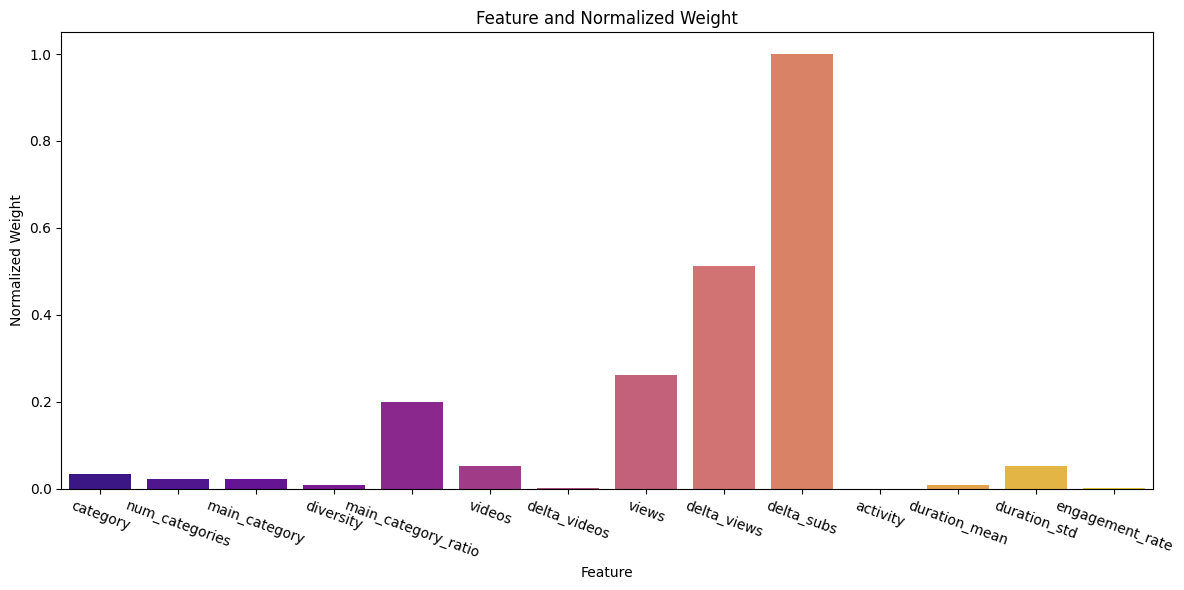

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Normalized Weight', data=df_weight, palette='plasma')
plt.title('Feature and Normalized Weight')
plt.xlabel('Feature')
plt.ylabel('Normalized Weight')
plt.xticks(rotation=-20)
plt.tight_layout()
plt.show()

遗留：

1. 关于time-dependent的特征产生，可以结合df_metadata中的videos上传时间，与df_timeseries匹配，再整合出一些特征，前面对应位置有写

2. 目前的采取的数据集是包含152个时间截，囊括了60%的频道，如果需要更长时间的数据集，频道数就会变少，所以需要取折衷

3. 我只从8338频道中采样了300个频道，当时考虑到训练时间可能比较久，后面会尝试训练多一些的数据

4. 一些可以调整的参数：time-lag，是用来表示当前采样点受前面多少采样点的影响，latent_dim，隐含层和记忆层维度，越高越好越慢

5. 152时间段，前111个作训练集，中间为验证集，后6个为测试集。后面可以调整选择更长的时间段，这样测试集的时间段也可以更长。

6. 其次，对于预测的性能，就是测试集输出的预测数据和真实数据的对比，还没有可视化。同时，可以产生未来时间段的数据集，用于预测，这些数据既可以来源于原始选择的频道，因为为了保证每个频道有相同的时间段，一些频道的数据是被截断的，也可以来源于随机产生。